# Deep Crossentropy method

In this section we'll extend your CEM implementation with neural networks! You will train a multi-layer neural network to solve simple continuous state space games. __Please make sure you're done with tabular crossentropy method from the previous notebook.__

![img](https://watanimg.elwatannews.com/old_news_images/large/249765_Large_20140709045740_11.jpg)



In [100]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

state vector dim = 4
n_actions = 2


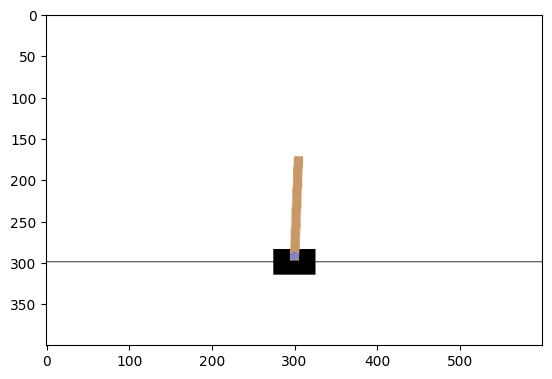

In [101]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you see "<classname> has no attribute .env", remove .env or update gym
env = gym.make("CartPole-v1", render_mode="rgb_array").env

env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape[0]

plt.imshow(env.render())
print("state vector dim =", state_dim)
print("n_actions =", n_actions)

env.close()

In [102]:
from sklearn.neural_network import MLPClassifier

agent = MLPClassifier(
    hidden_layer_sizes=(64, 64),
    activation='relu',
    solver='adam',
    batch_size=64,
    learning_rate_init=0.001,
    max_iter=1,             
    random_state=42
)

initial_state = env.reset()[0]
agent.partial_fit([initial_state], [0], classes=range(n_actions))


C:\Users\Danil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=(64, 64), max_iter=1,
              random_state=42)

In [103]:
def generate_session(env, agent, t_max=1000):
    states, actions = [], []
    total_reward = 0
    s, _ = env.reset()
    for t in range(t_max):

        probs = agent.predict_proba([s])[0]  
        assert probs.shape == (env.action_space.n,), "make sure probabilities are a vector"

        a = np.random.choice(env.action_space.n, p=probs)  
        
        new_s, r, terminated, truncated, _ = env.step(a)
        states.append(s)
        actions.append(a)
        total_reward += r
        s = new_s
        if terminated or truncated:
            break
    return states, actions, total_reward


In [104]:
dummy_states, dummy_actions, dummy_reward = generate_session(env, agent, t_max=5)
print("states:", np.stack(dummy_states))
print("actions:", dummy_actions)
print("reward:", dummy_reward)


states: [[ 0.01858619  0.03833606  0.03328369 -0.0384229 ]
 [ 0.01935291 -0.15724698  0.03251524  0.26457277]
 [ 0.01620797  0.03739615  0.03780669 -0.0176798 ]
 [ 0.0169559  -0.15824702  0.0374531   0.28668776]
 [ 0.01379095  0.03632134  0.04318685  0.00604854]]
actions: [0, 1, 0, 1, 0]
reward: 5.0


In [105]:
def select_elites(states_batch, actions_batch, rewards_batch, percentile=50):
    threshold = np.percentile(rewards_batch, percentile)
    elite_indices = [i for i, r in enumerate(rewards_batch) if r > threshold]
    elite_states = [s for i in elite_indices for s in states_batch[i]]
    elite_actions = [a for i in elite_indices for a in actions_batch[i]]
    return elite_states, elite_actions

In [106]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[0, 200]):
    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append((mean_reward, threshold))
    
    print(f"[{len(log):03}] mean reward = {mean_reward:.2f}, threshold = {threshold:.2f}")

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    means, thresholds = zip(*log)
    plt.plot(means, label='Mean rewards')
    plt.plot(thresholds, label='Thresholds')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    if reward_range is not None:
        plt.hist(rewards_batch, bins=20, range=reward_range)
    else:
        plt.hist(rewards_batch, bins=20)
    plt.axvline(threshold, color='red', linestyle='--', label='Percentile threshold')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



[001] mean reward = 25.67, threshold = 31.25


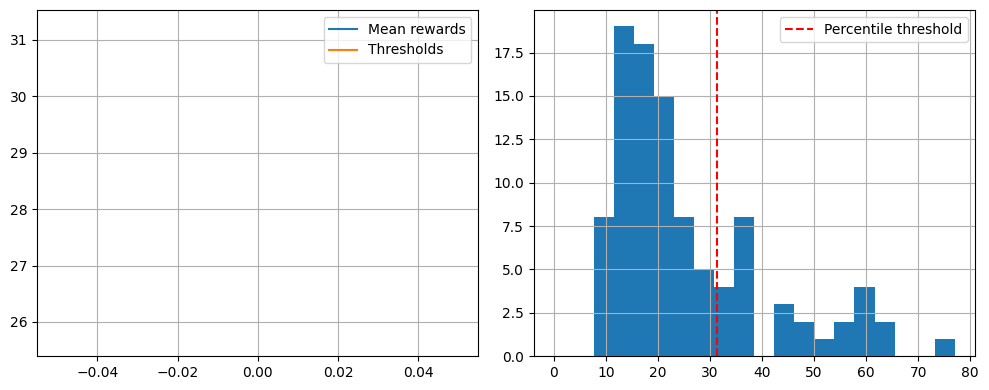

[002] mean reward = 24.40, threshold = 29.00


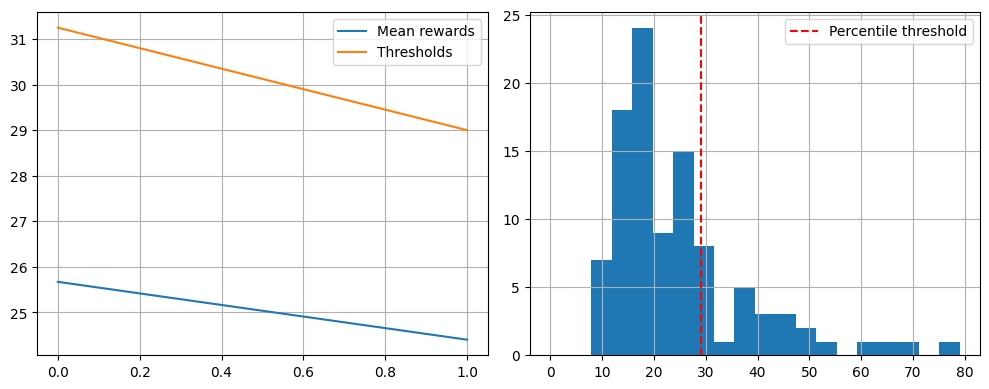

[003] mean reward = 29.33, threshold = 37.25


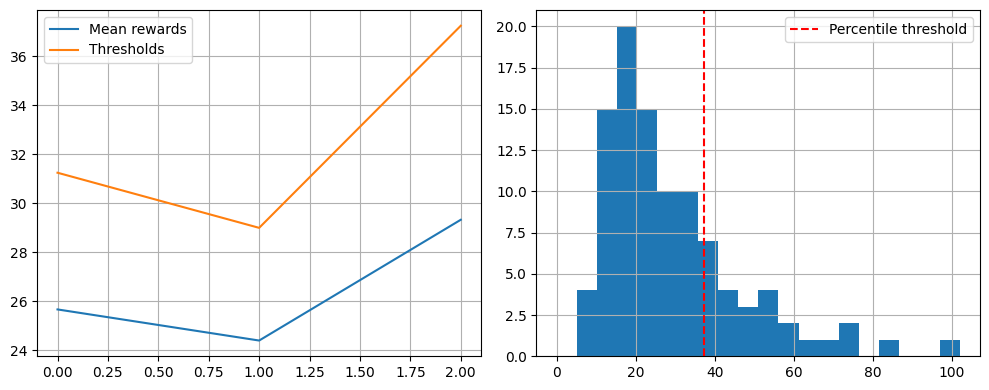

[004] mean reward = 31.79, threshold = 40.25


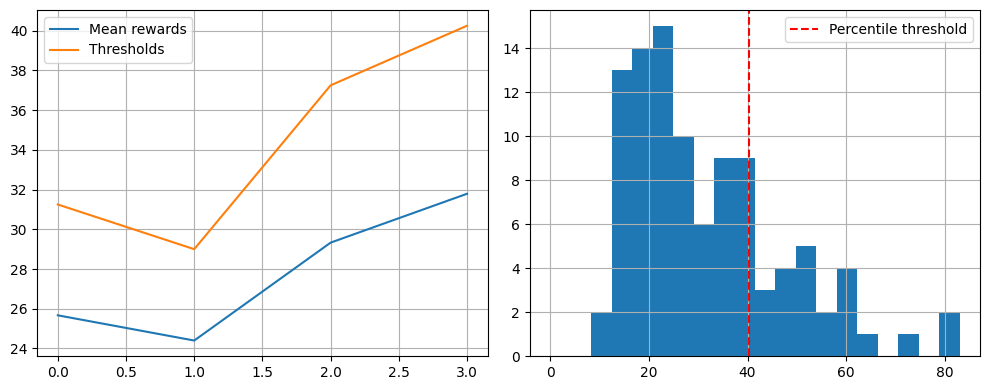

[005] mean reward = 34.44, threshold = 44.00


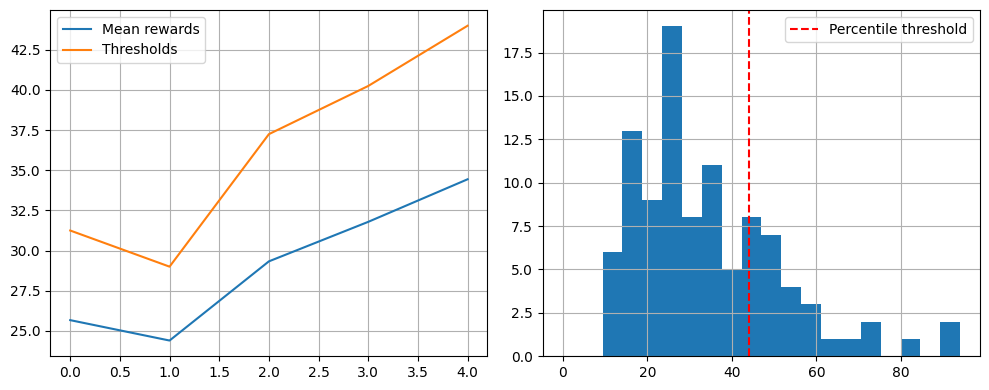

[006] mean reward = 39.94, threshold = 54.00


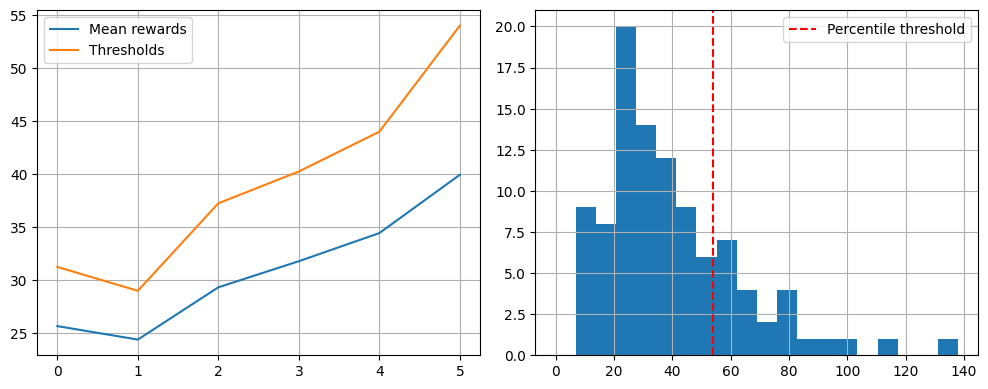

[007] mean reward = 42.16, threshold = 55.25


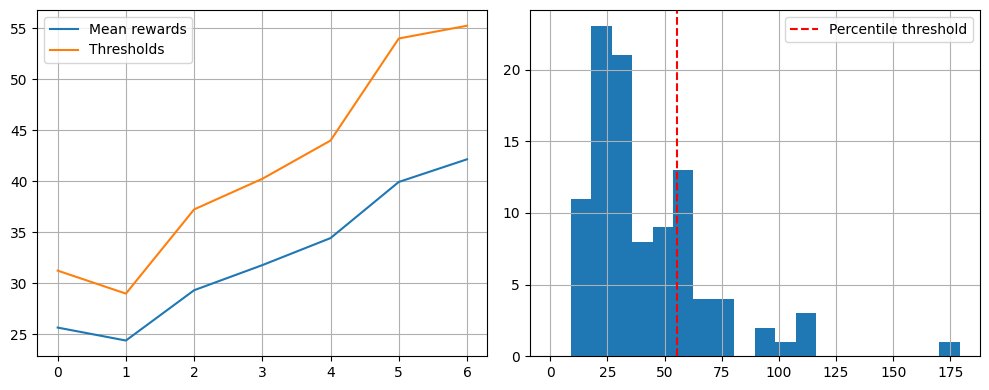

[008] mean reward = 54.07, threshold = 73.25


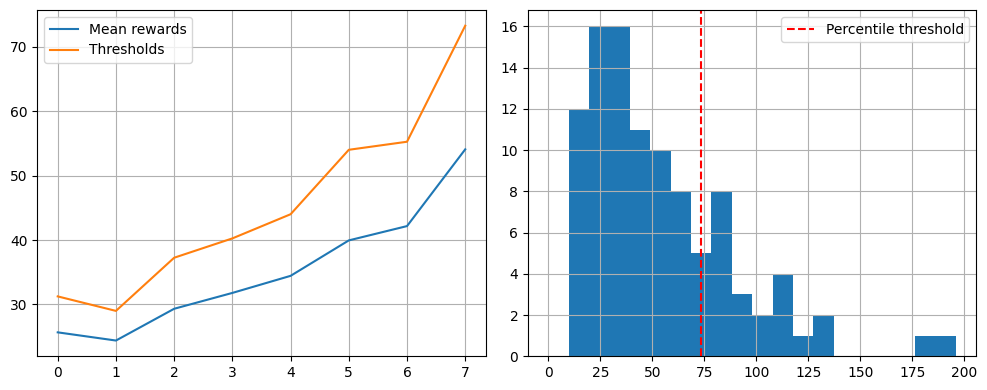

[009] mean reward = 69.10, threshold = 94.75


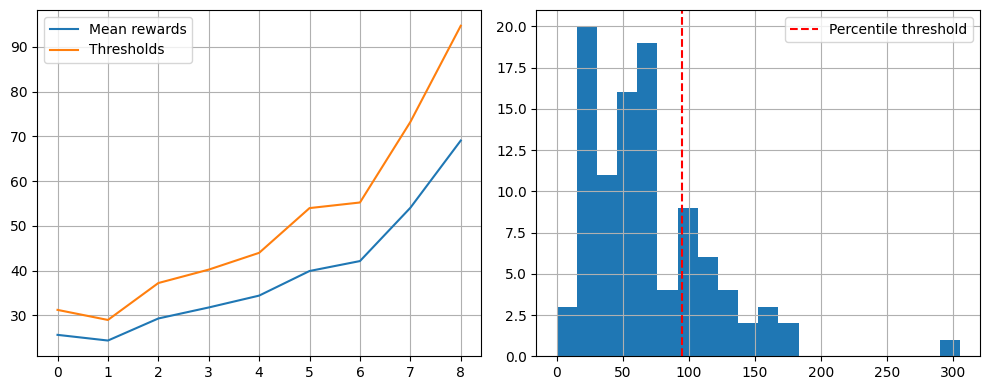

[010] mean reward = 91.73, threshold = 120.00


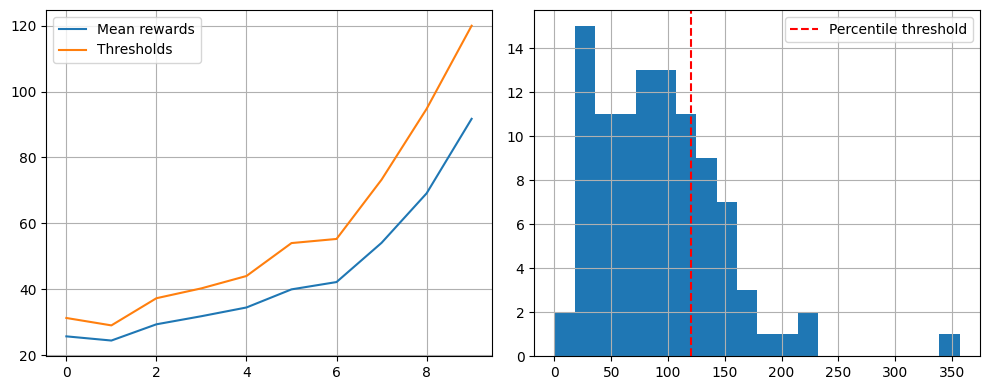

[011] mean reward = 132.45, threshold = 165.50


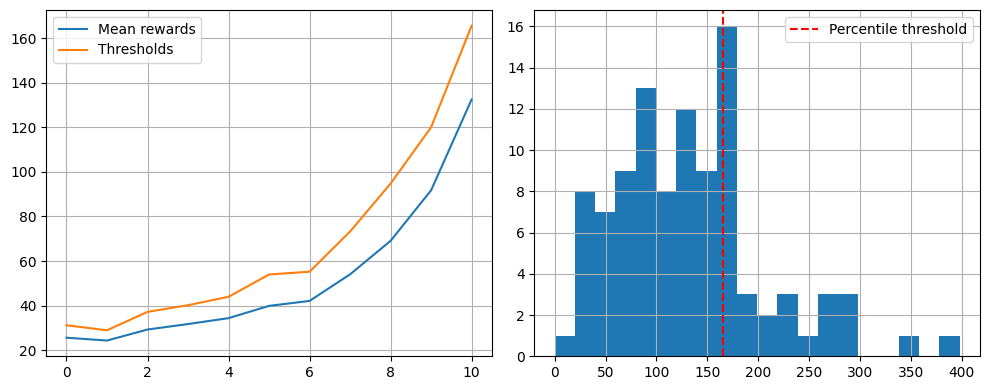

[012] mean reward = 141.30, threshold = 177.25


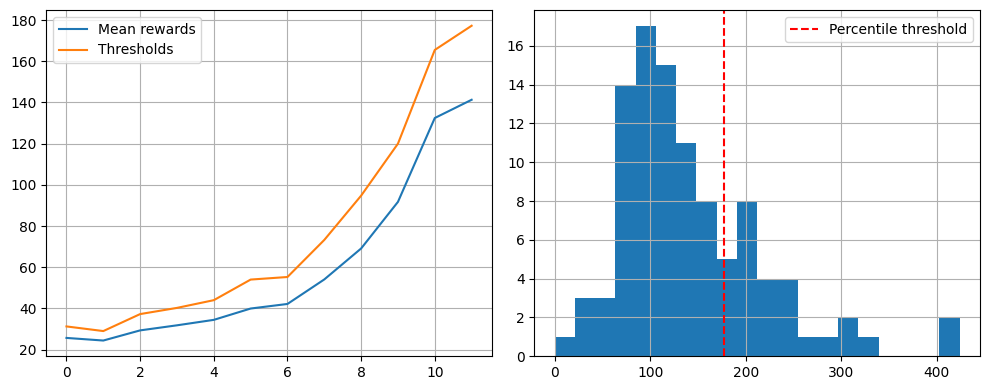

[013] mean reward = 200.15, threshold = 248.25


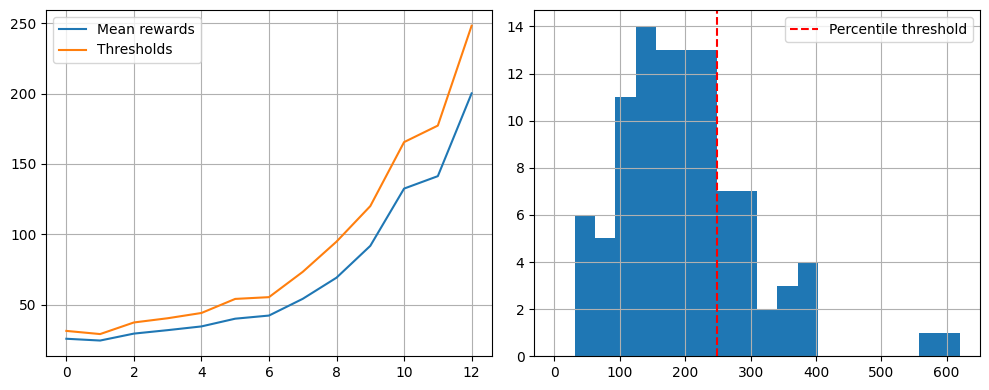

You Win! You may stop training now via KeyboardInterrupt.
[014] mean reward = 215.66, threshold = 255.00


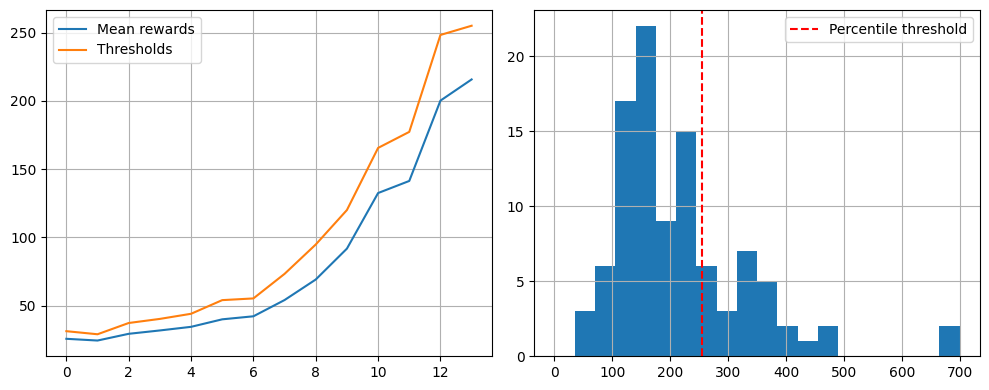

You Win! You may stop training now via KeyboardInterrupt.
[015] mean reward = 311.07, threshold = 401.00


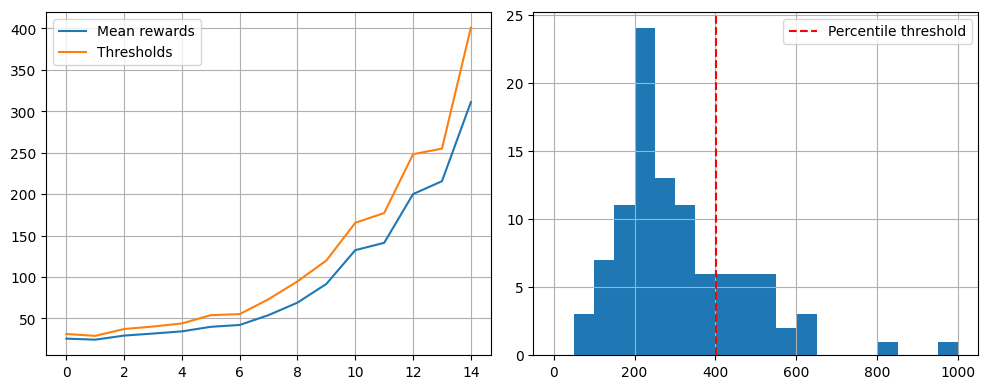

You Win! You may stop training now via KeyboardInterrupt.
[016] mean reward = 395.64, threshold = 530.50


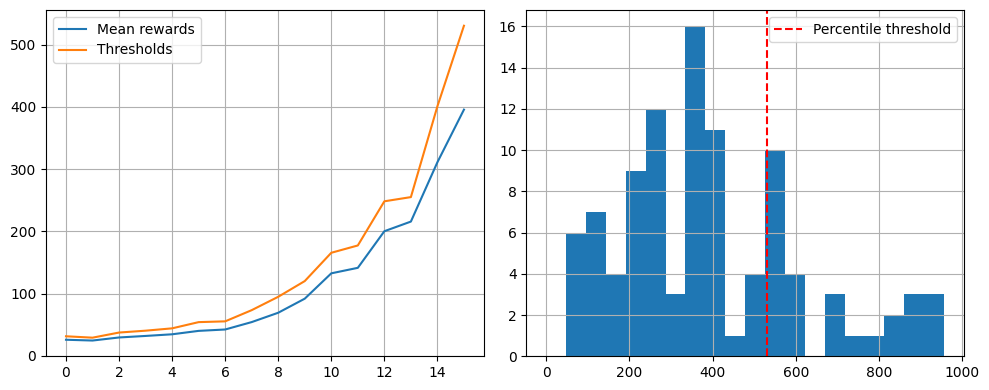

You Win! You may stop training now via KeyboardInterrupt.
[017] mean reward = 351.54, threshold = 418.75


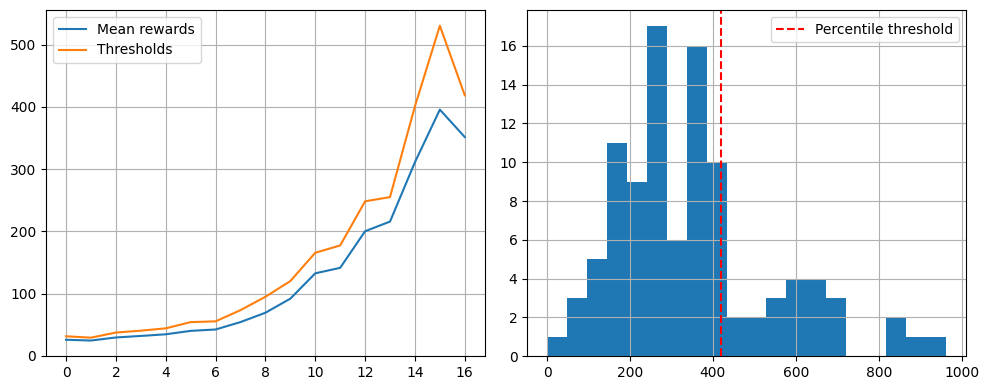

You Win! You may stop training now via KeyboardInterrupt.
[018] mean reward = 534.74, threshold = 762.00


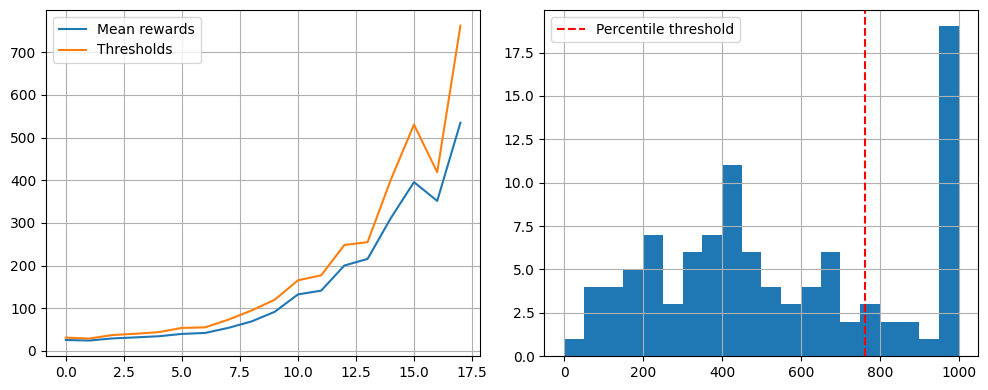

You Win! You may stop training now via KeyboardInterrupt.
No elite samples this iteration. Skipping training.
[019] mean reward = 770.51, threshold = 1000.00


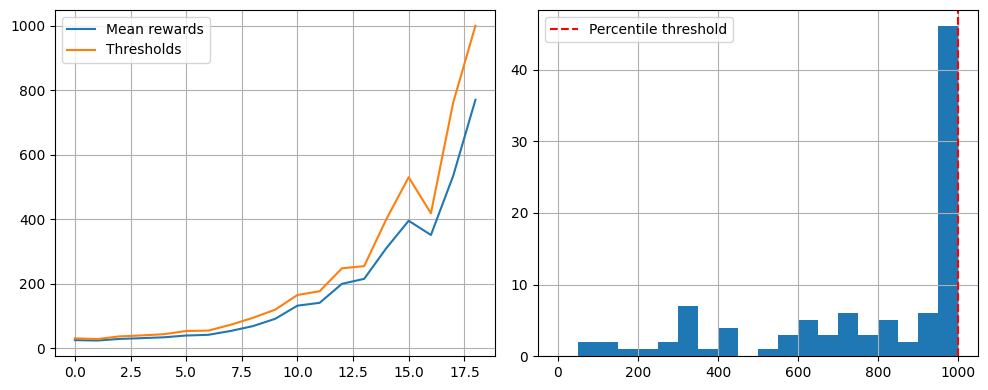

No elite samples this iteration. Skipping training.
[020] mean reward = 745.94, threshold = 1000.00


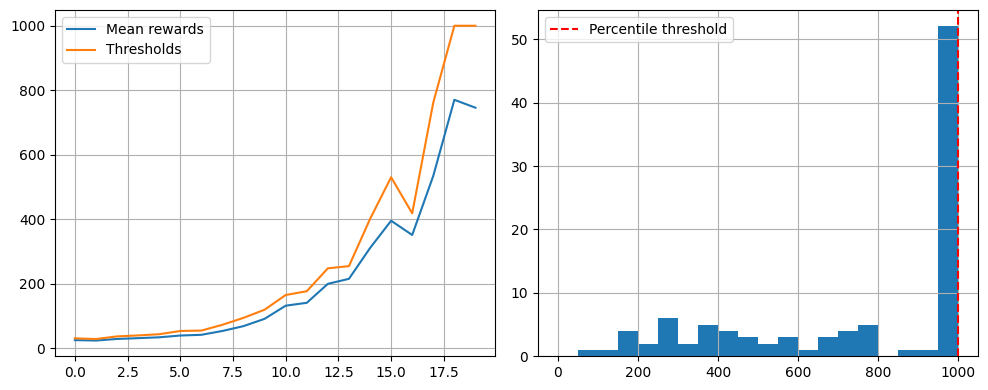

No elite samples this iteration. Skipping training.
[021] mean reward = 733.54, threshold = 1000.00


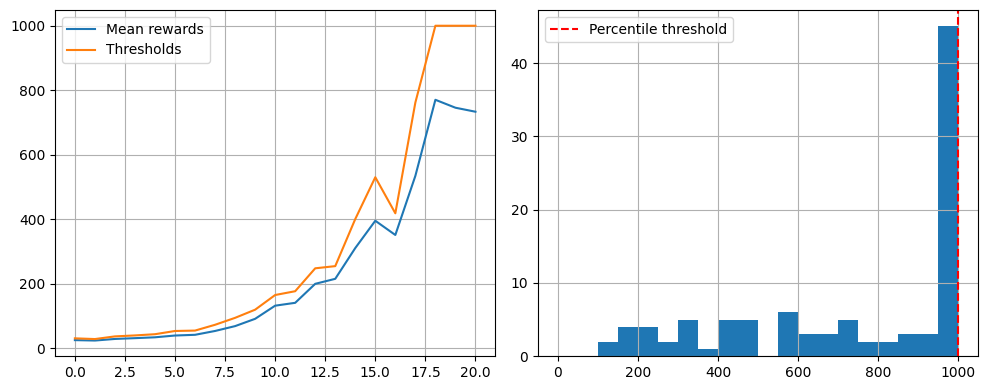

No elite samples this iteration. Skipping training.
[022] mean reward = 771.62, threshold = 1000.00


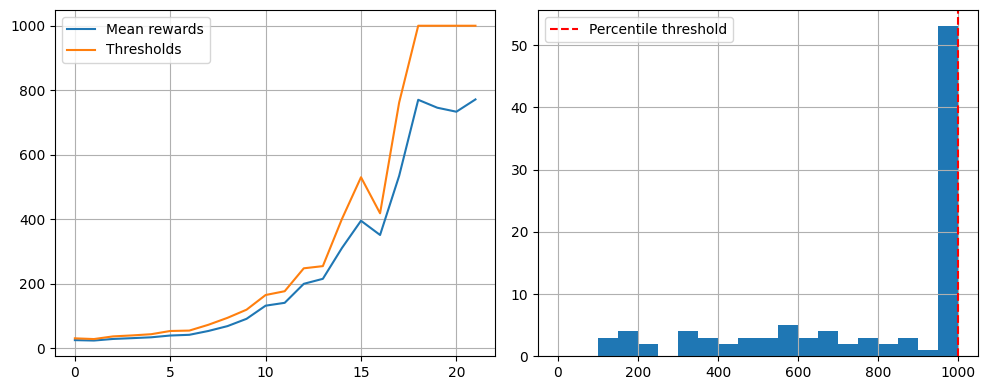

No elite samples this iteration. Skipping training.
[023] mean reward = 701.20, threshold = 1000.00


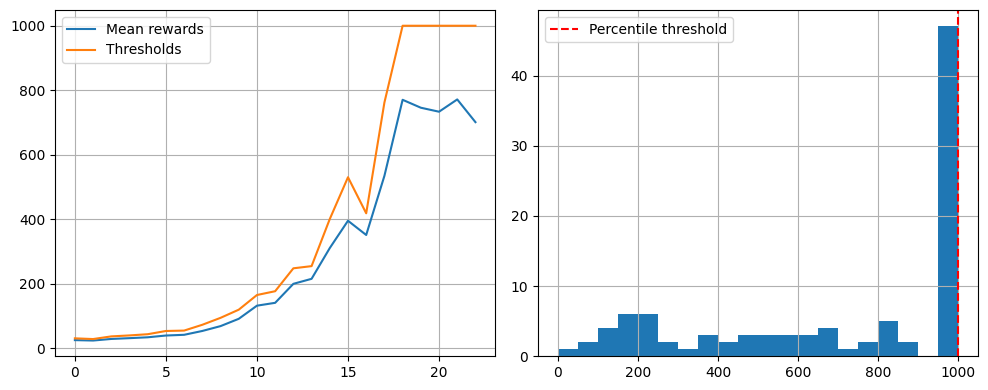

No elite samples this iteration. Skipping training.
[024] mean reward = 770.55, threshold = 1000.00


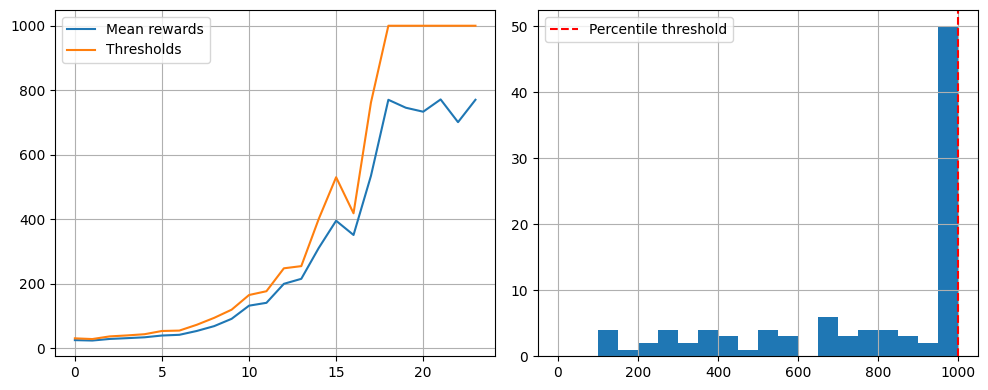

No elite samples this iteration. Skipping training.
[025] mean reward = 764.15, threshold = 1000.00


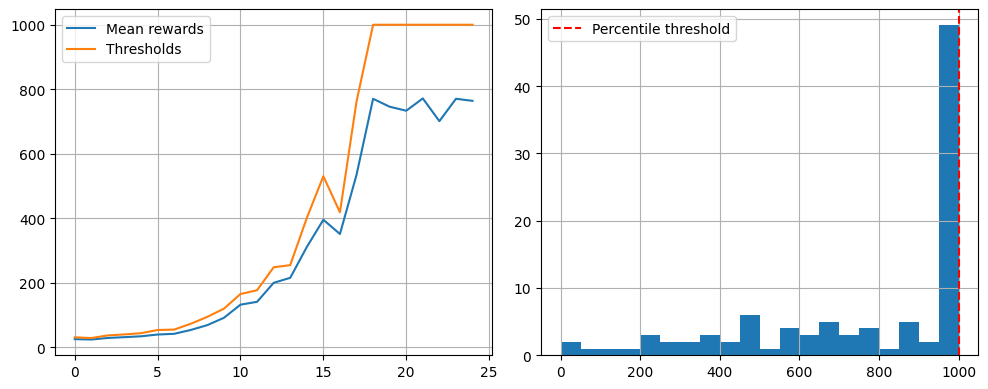

No elite samples this iteration. Skipping training.
[026] mean reward = 736.45, threshold = 1000.00


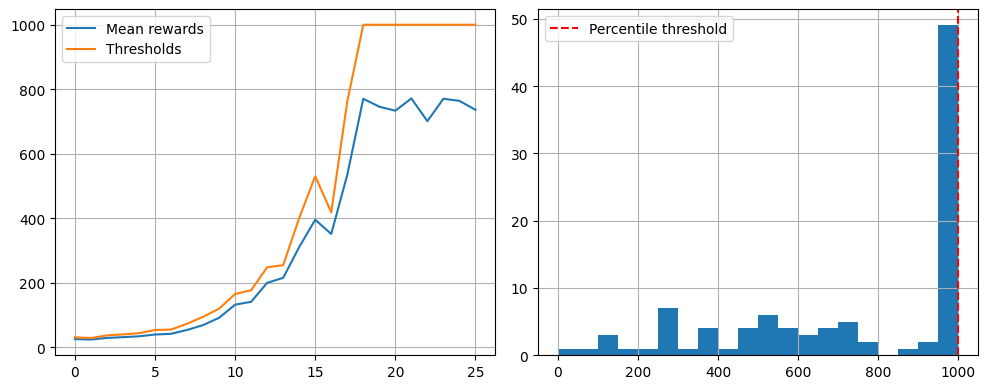

No elite samples this iteration. Skipping training.
[027] mean reward = 697.39, threshold = 1000.00


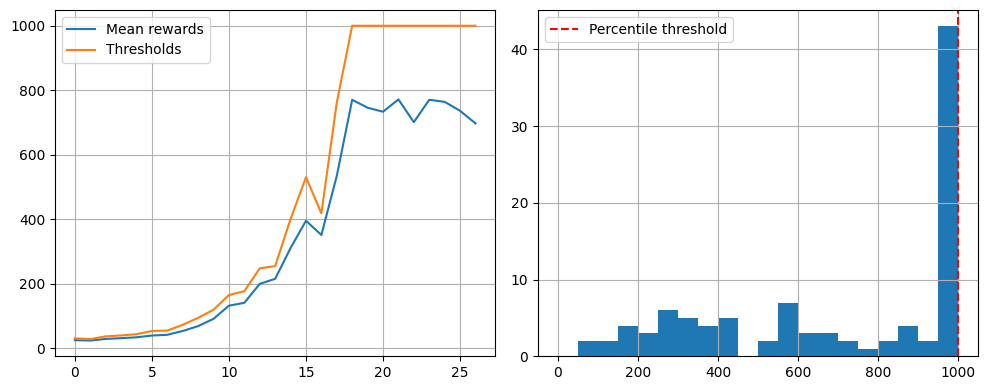

No elite samples this iteration. Skipping training.
[028] mean reward = 733.20, threshold = 1000.00


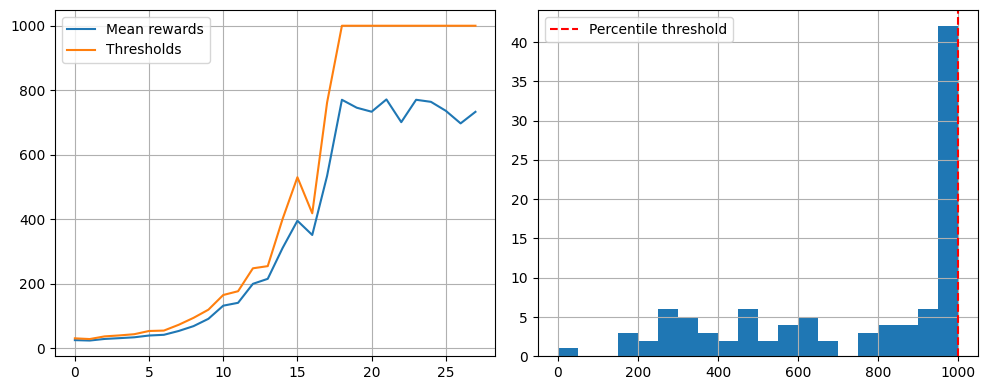

No elite samples this iteration. Skipping training.
[029] mean reward = 751.21, threshold = 1000.00


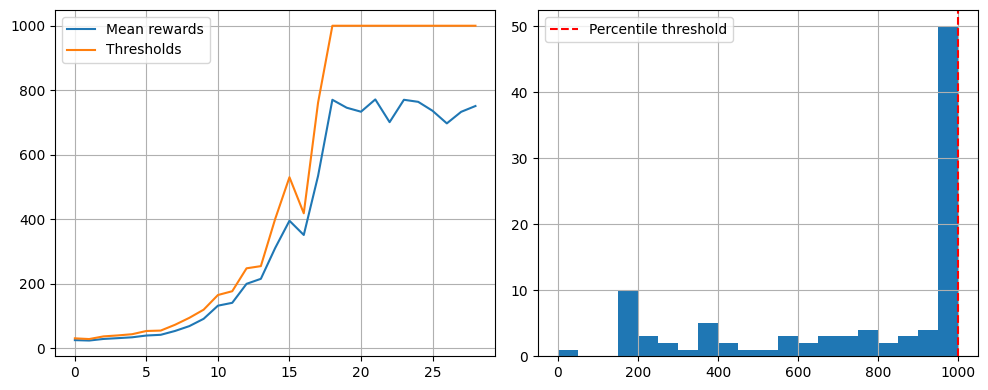

No elite samples this iteration. Skipping training.
[030] mean reward = 708.34, threshold = 1000.00


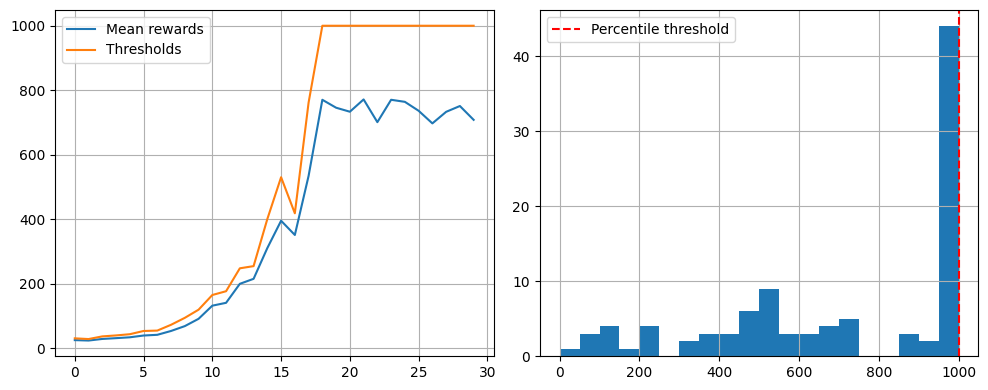

No elite samples this iteration. Skipping training.
[031] mean reward = 754.62, threshold = 1000.00


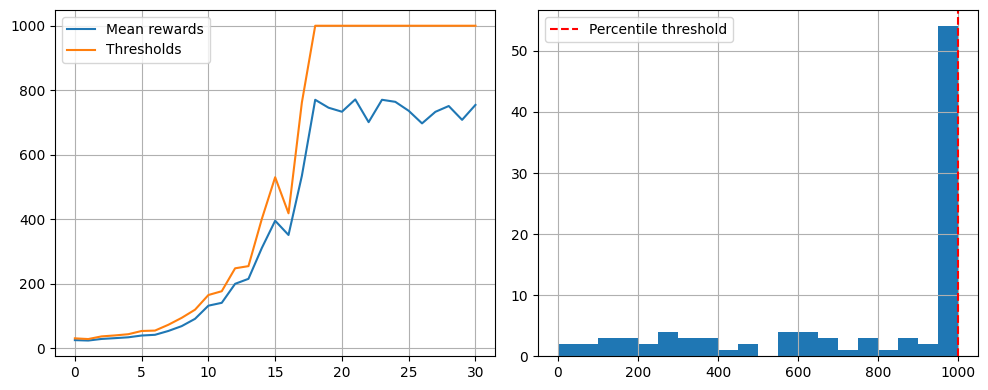

No elite samples this iteration. Skipping training.
[032] mean reward = 777.21, threshold = 1000.00


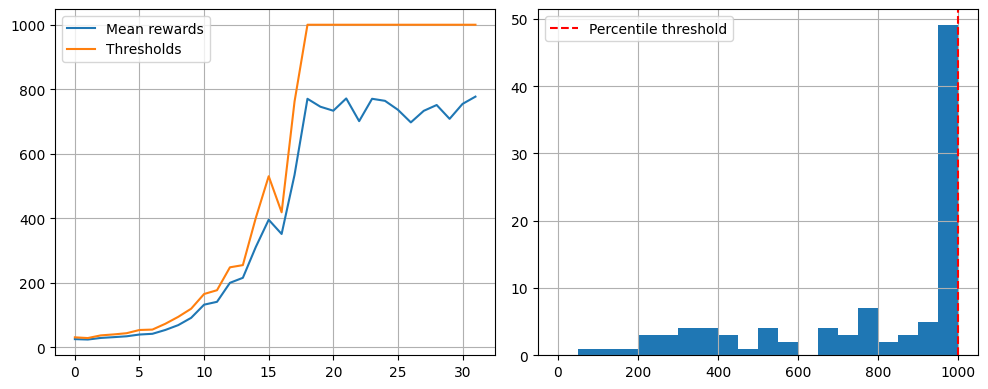

No elite samples this iteration. Skipping training.
[033] mean reward = 691.44, threshold = 1000.00


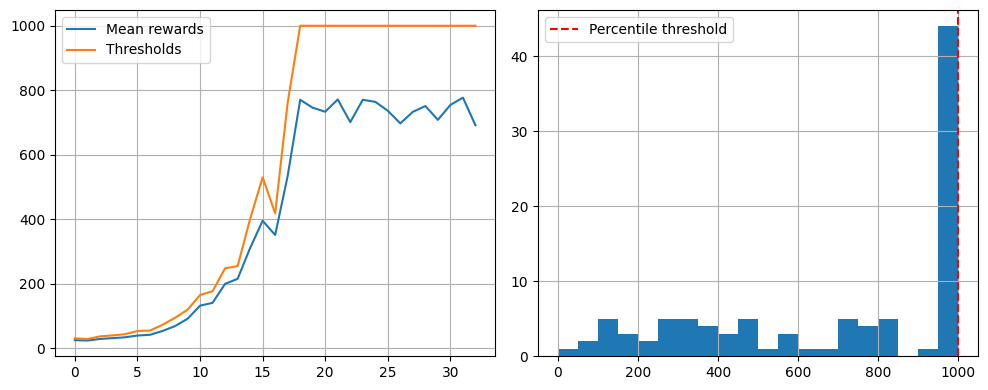

No elite samples this iteration. Skipping training.
[034] mean reward = 689.35, threshold = 1000.00


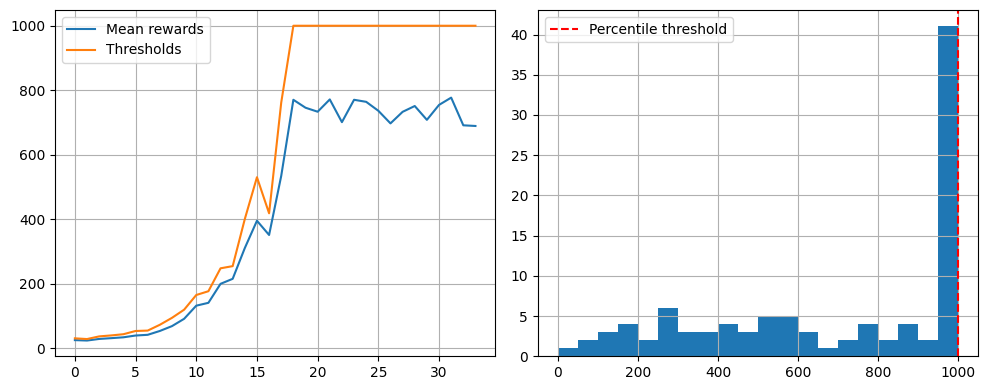

No elite samples this iteration. Skipping training.
[035] mean reward = 777.25, threshold = 1000.00


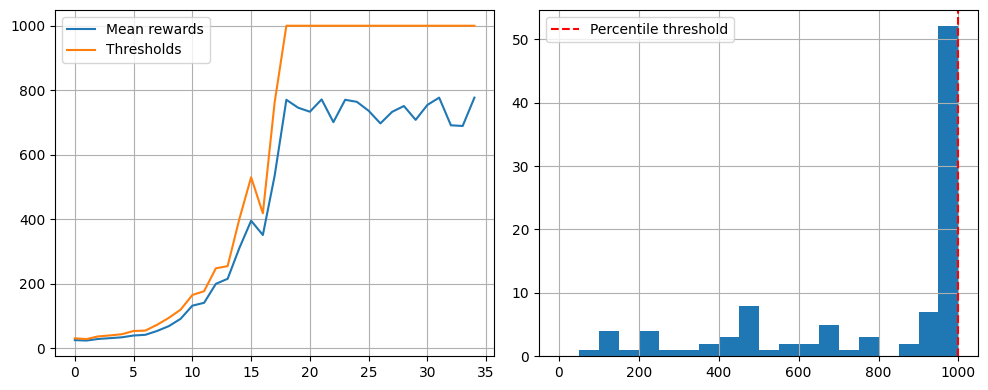

No elite samples this iteration. Skipping training.
[036] mean reward = 757.02, threshold = 1000.00


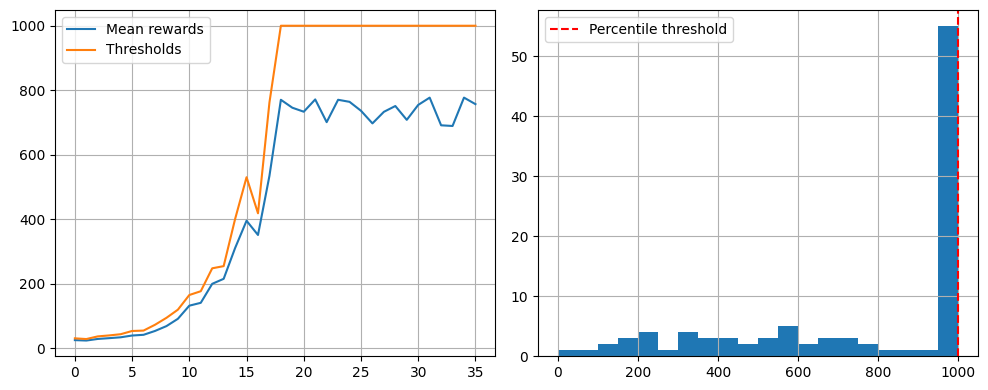

No elite samples this iteration. Skipping training.
[037] mean reward = 761.07, threshold = 1000.00


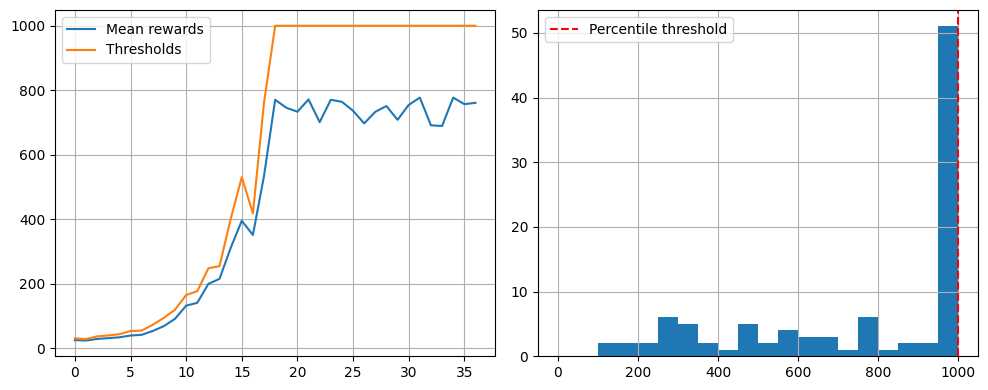

No elite samples this iteration. Skipping training.
[038] mean reward = 764.37, threshold = 1000.00


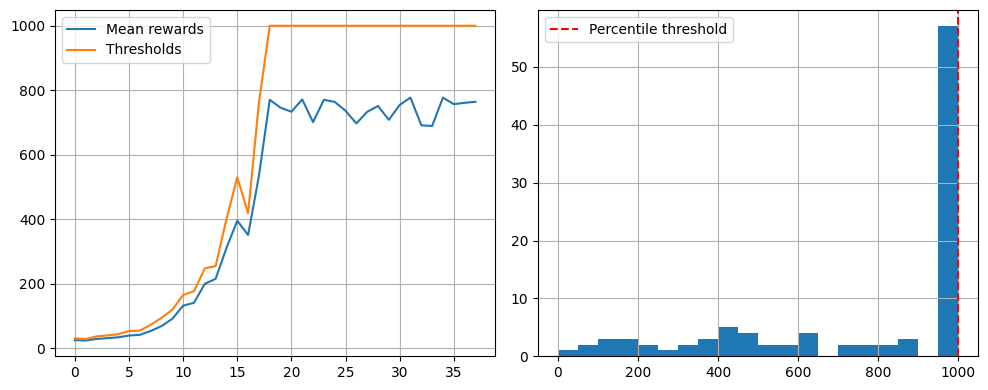

No elite samples this iteration. Skipping training.
[039] mean reward = 752.87, threshold = 1000.00


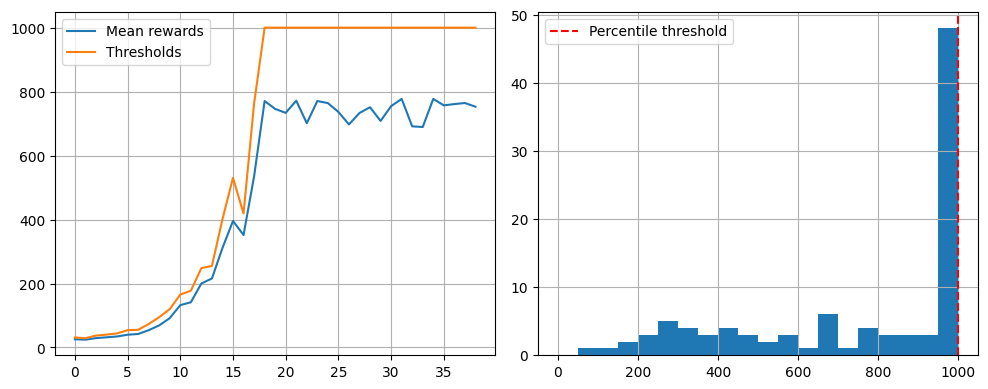

No elite samples this iteration. Skipping training.
[040] mean reward = 703.24, threshold = 1000.00


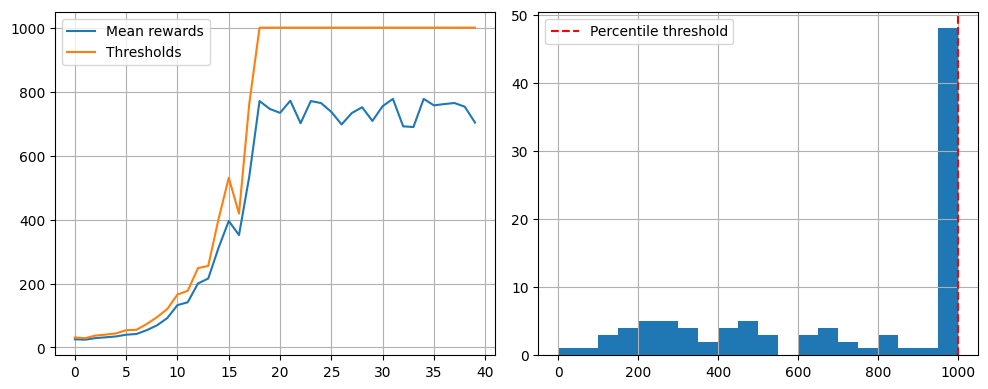

No elite samples this iteration. Skipping training.
[041] mean reward = 716.63, threshold = 1000.00


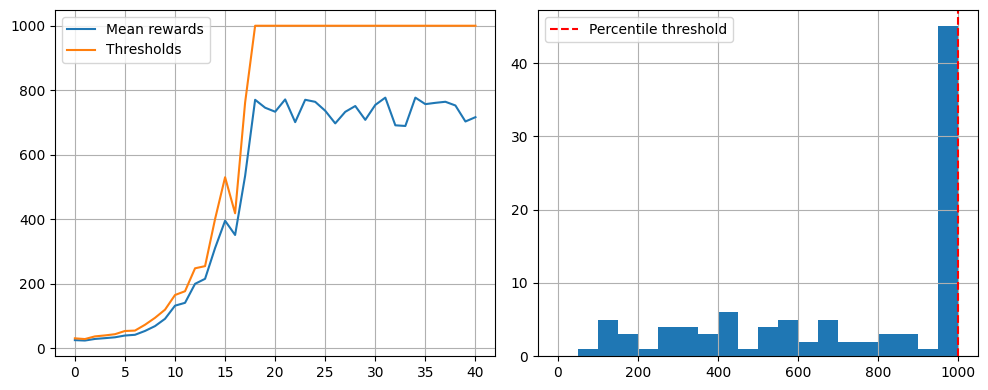

No elite samples this iteration. Skipping training.
[042] mean reward = 788.92, threshold = 1000.00


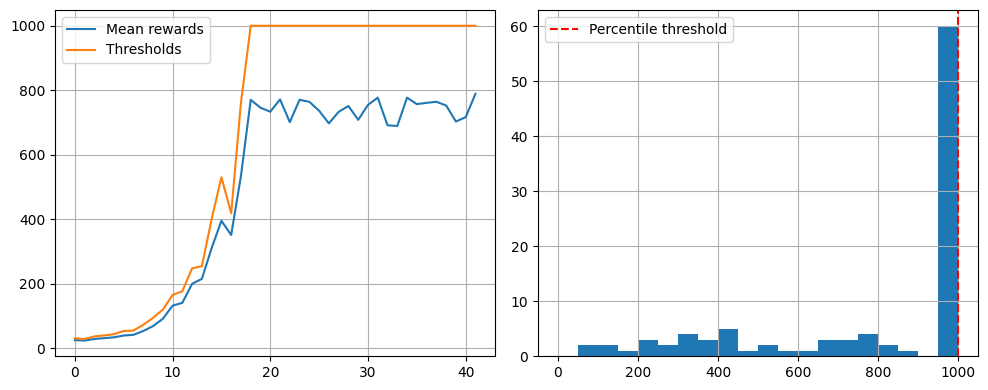

No elite samples this iteration. Skipping training.
[043] mean reward = 762.98, threshold = 1000.00


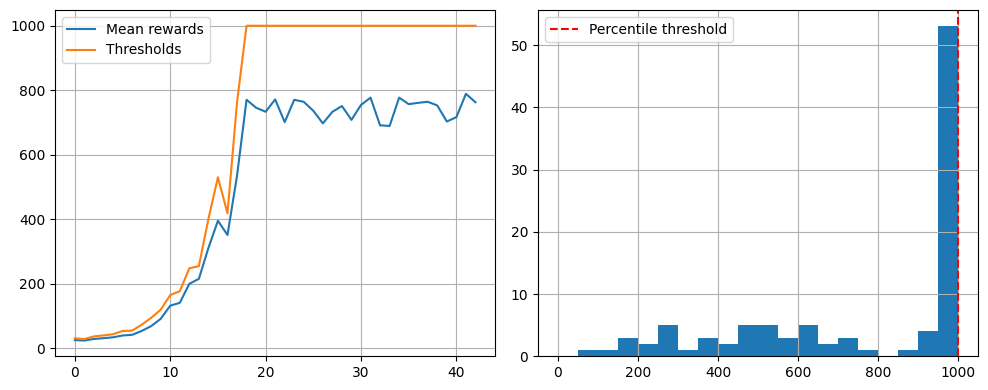

No elite samples this iteration. Skipping training.
[044] mean reward = 779.71, threshold = 1000.00


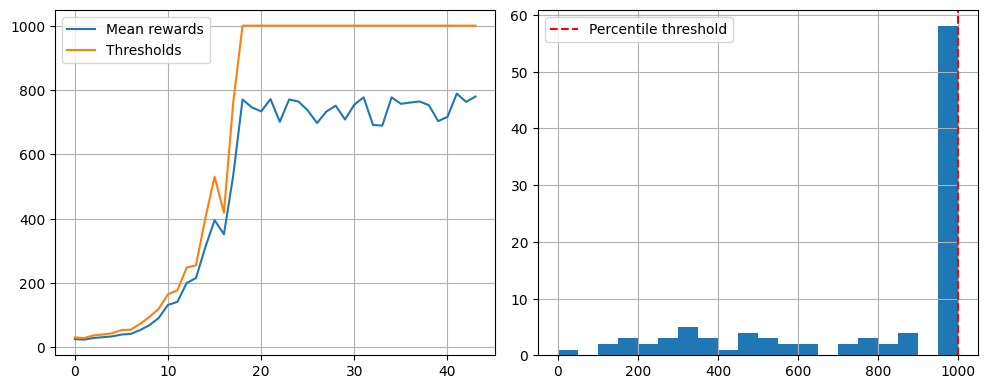

No elite samples this iteration. Skipping training.
[045] mean reward = 745.77, threshold = 1000.00


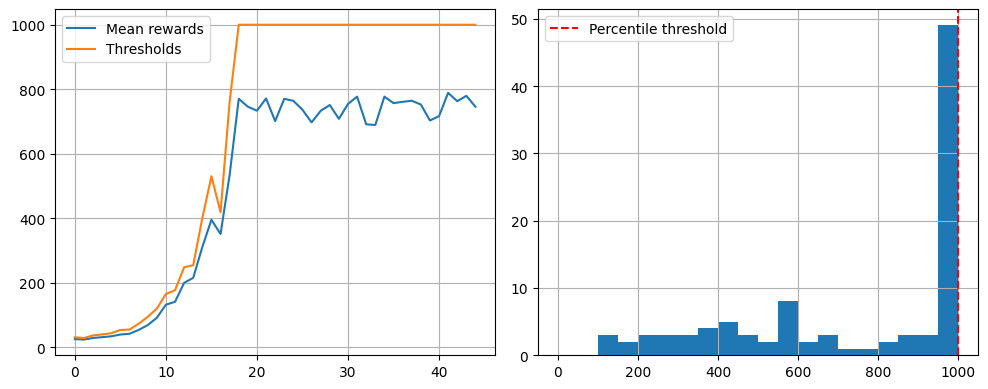

No elite samples this iteration. Skipping training.
[046] mean reward = 767.22, threshold = 1000.00


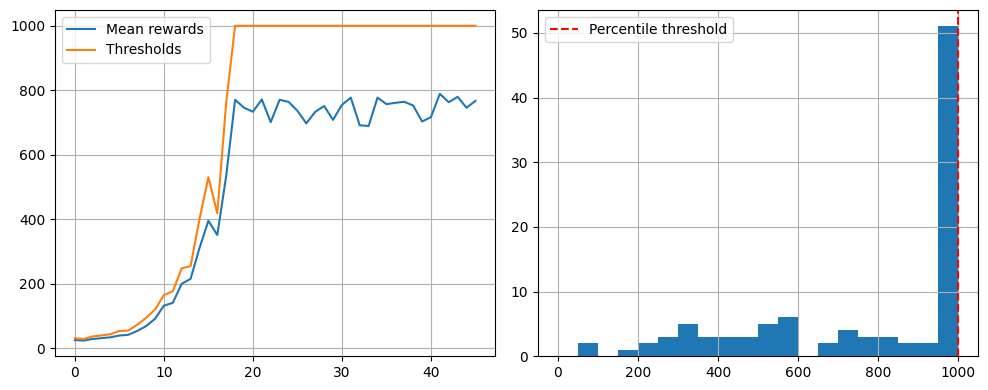

No elite samples this iteration. Skipping training.
[047] mean reward = 782.44, threshold = 1000.00


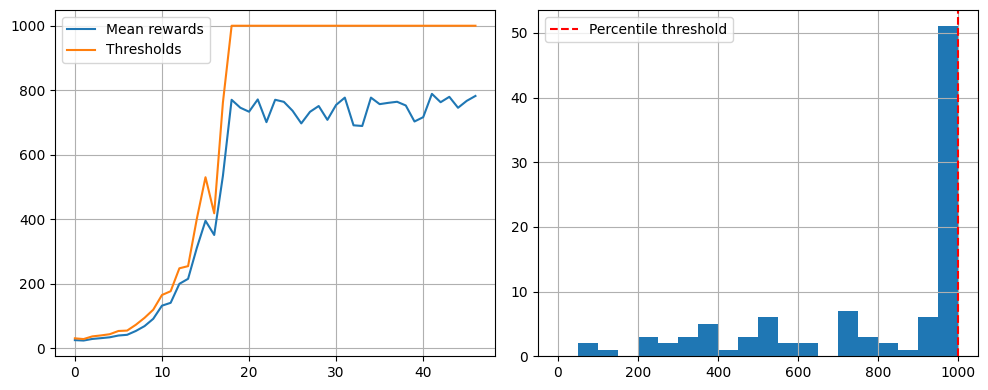

No elite samples this iteration. Skipping training.
[048] mean reward = 759.06, threshold = 1000.00


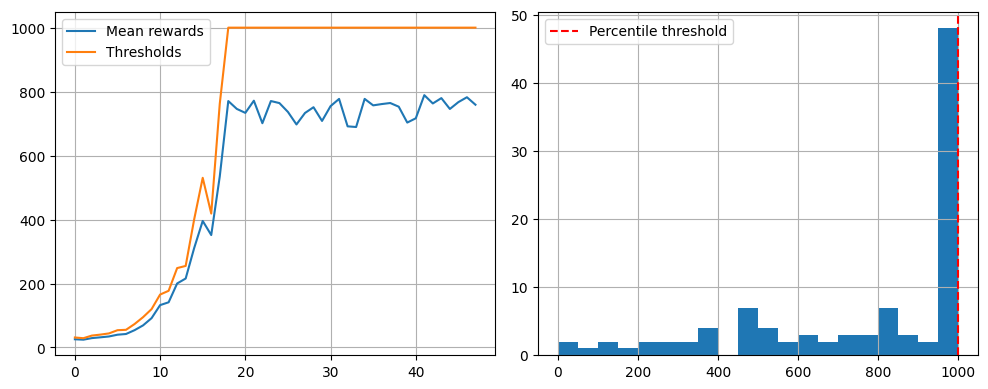

No elite samples this iteration. Skipping training.
[049] mean reward = 764.60, threshold = 1000.00


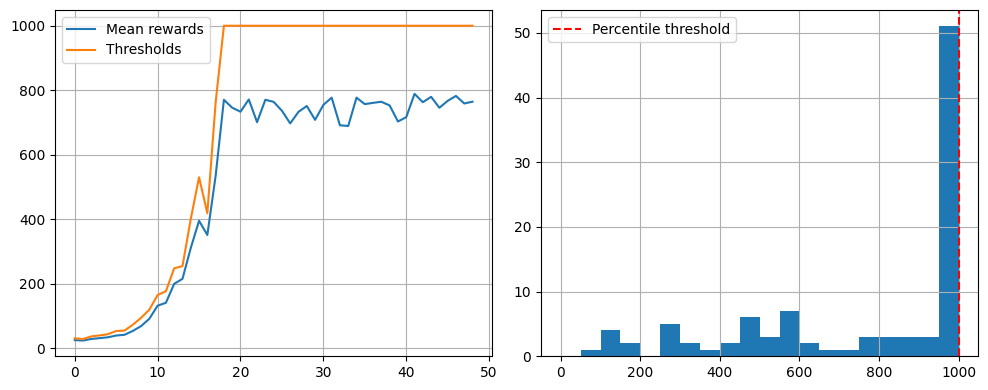

No elite samples this iteration. Skipping training.
[050] mean reward = 751.64, threshold = 1000.00


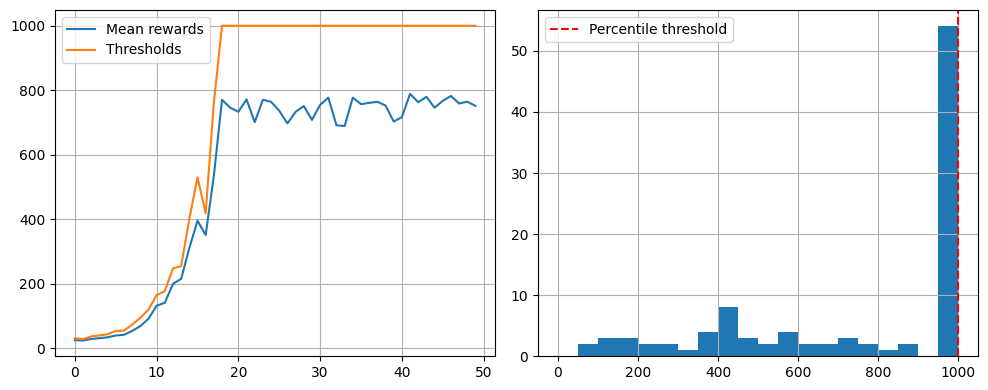

No elite samples this iteration. Skipping training.
[051] mean reward = 758.99, threshold = 1000.00


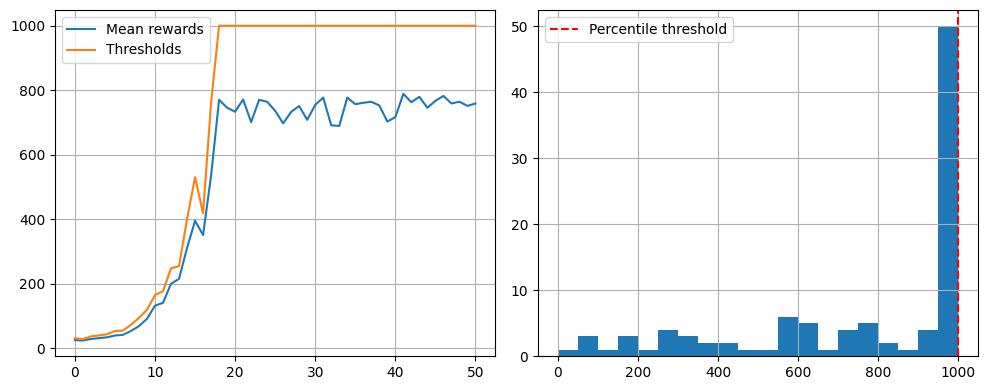

No elite samples this iteration. Skipping training.
[052] mean reward = 744.39, threshold = 1000.00


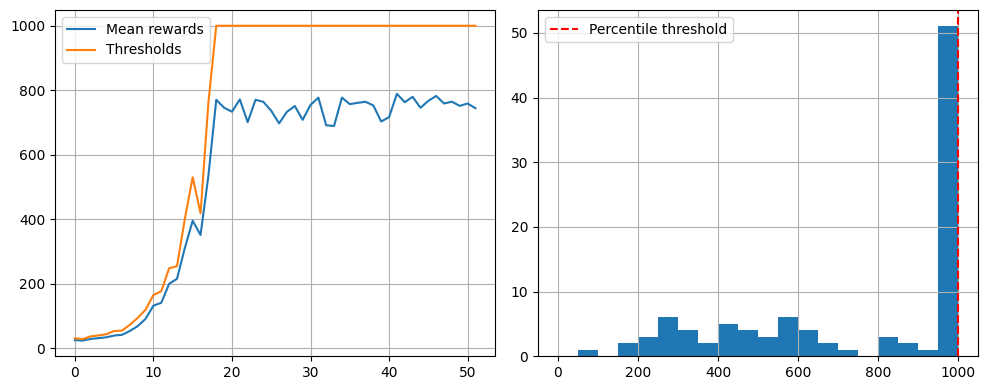

No elite samples this iteration. Skipping training.
[053] mean reward = 784.68, threshold = 1000.00


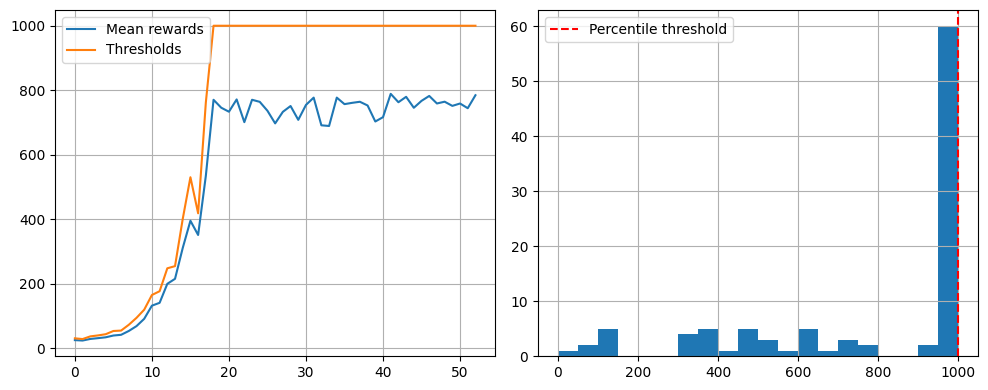

No elite samples this iteration. Skipping training.
[054] mean reward = 714.28, threshold = 1000.00


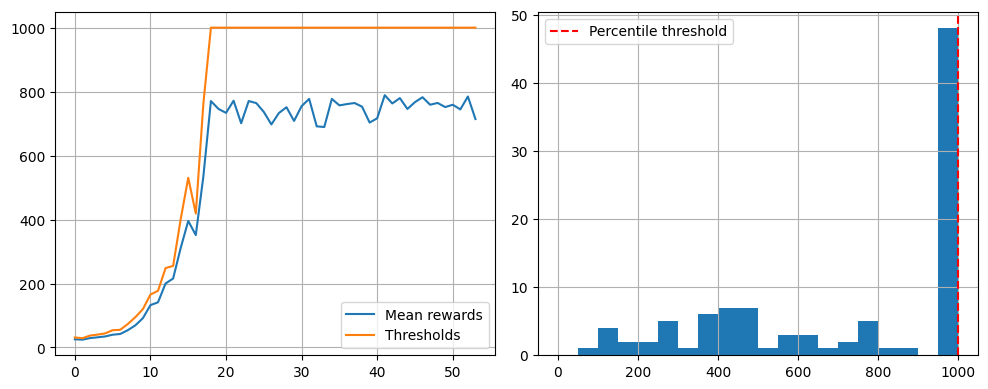

No elite samples this iteration. Skipping training.
[055] mean reward = 738.77, threshold = 1000.00


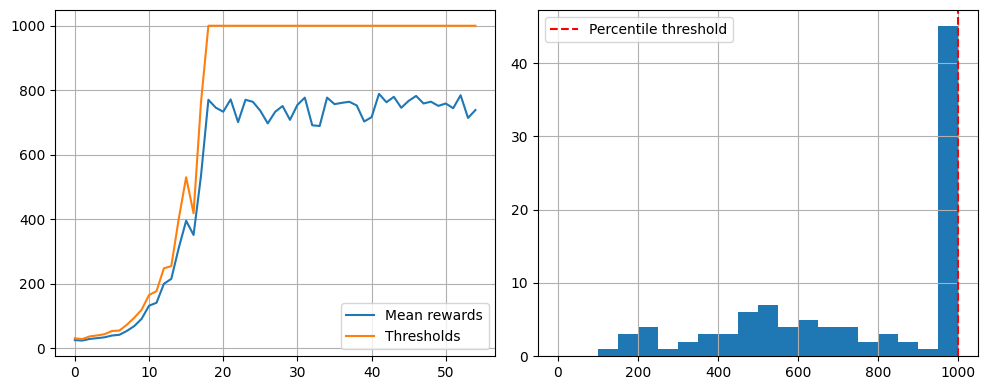

No elite samples this iteration. Skipping training.
[056] mean reward = 788.53, threshold = 1000.00


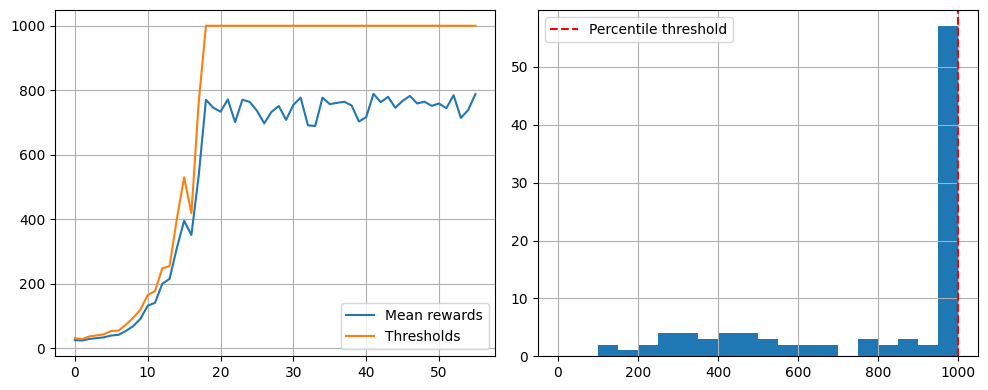

No elite samples this iteration. Skipping training.
[057] mean reward = 804.48, threshold = 1000.00


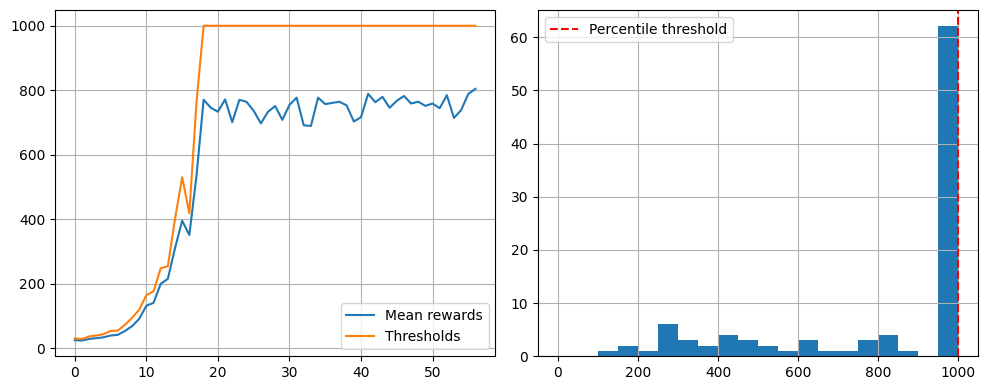

No elite samples this iteration. Skipping training.
[058] mean reward = 742.47, threshold = 1000.00


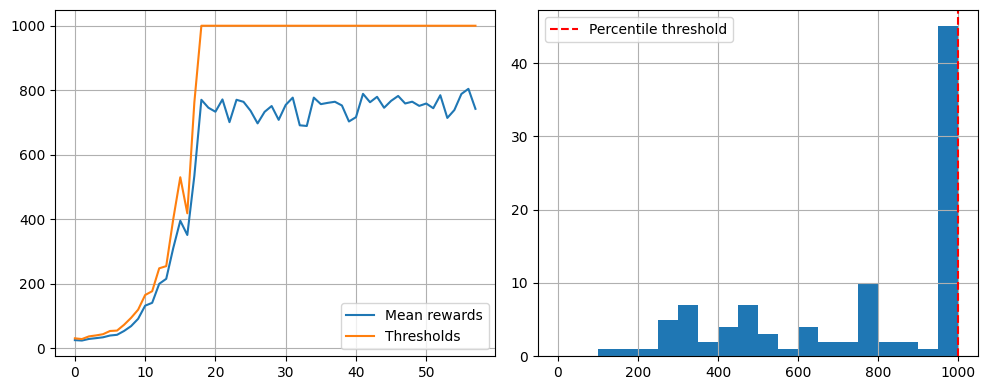

No elite samples this iteration. Skipping training.
[059] mean reward = 771.03, threshold = 1000.00


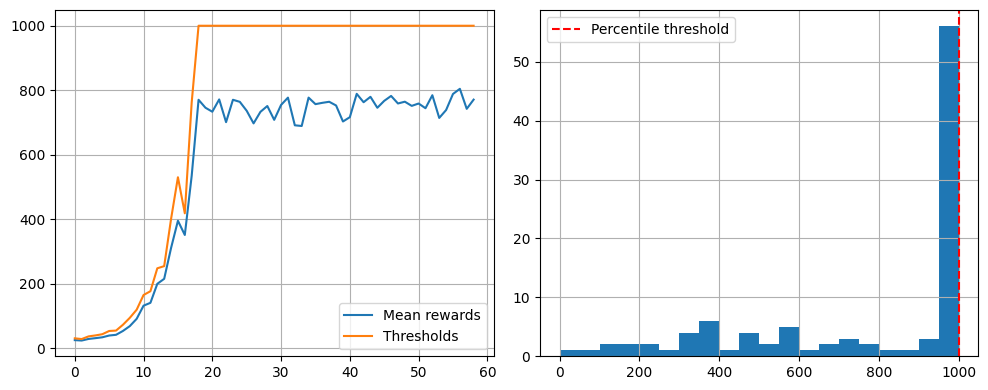

No elite samples this iteration. Skipping training.
[060] mean reward = 796.86, threshold = 1000.00


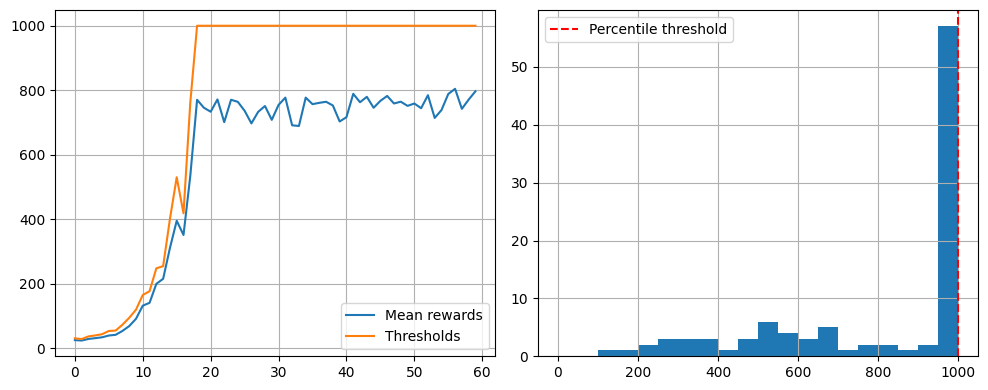

No elite samples this iteration. Skipping training.
[061] mean reward = 722.56, threshold = 1000.00


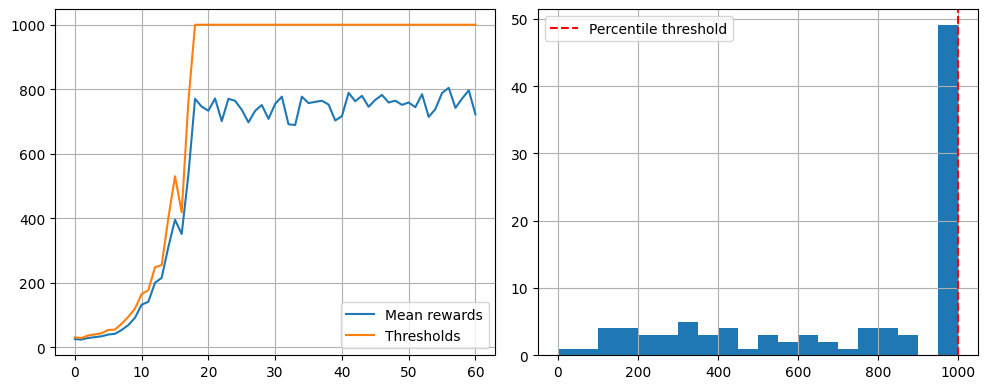

No elite samples this iteration. Skipping training.
[062] mean reward = 753.28, threshold = 1000.00


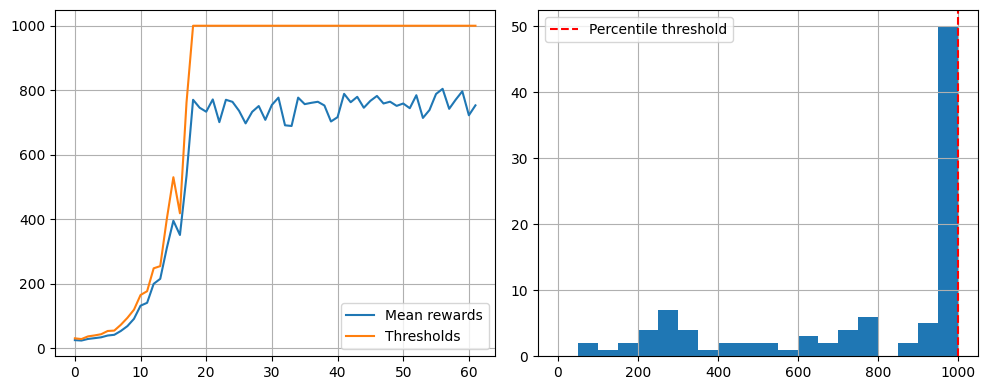

No elite samples this iteration. Skipping training.
[063] mean reward = 770.10, threshold = 1000.00


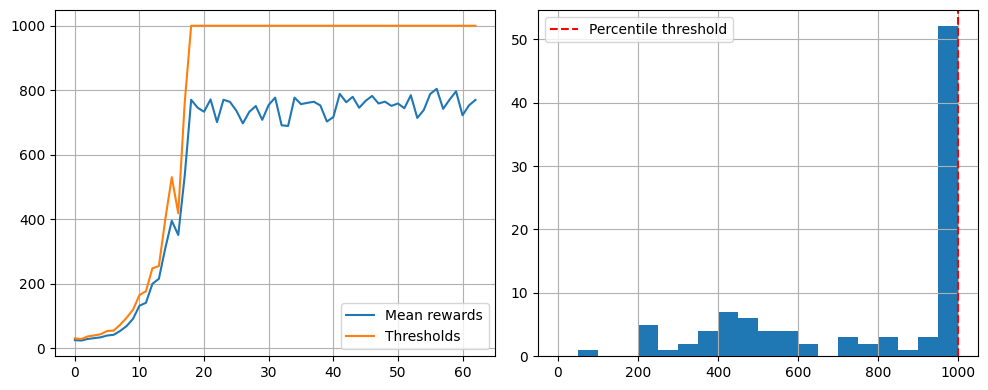

No elite samples this iteration. Skipping training.
[064] mean reward = 732.40, threshold = 1000.00


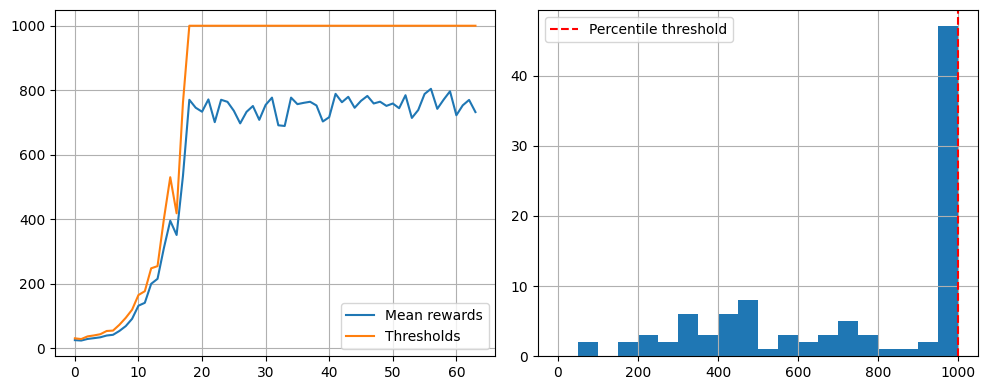

No elite samples this iteration. Skipping training.
[065] mean reward = 721.99, threshold = 1000.00


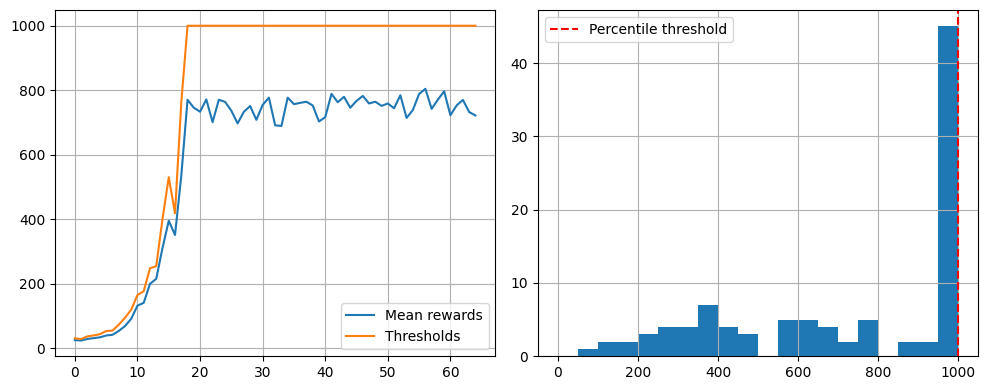

No elite samples this iteration. Skipping training.
[066] mean reward = 769.99, threshold = 1000.00


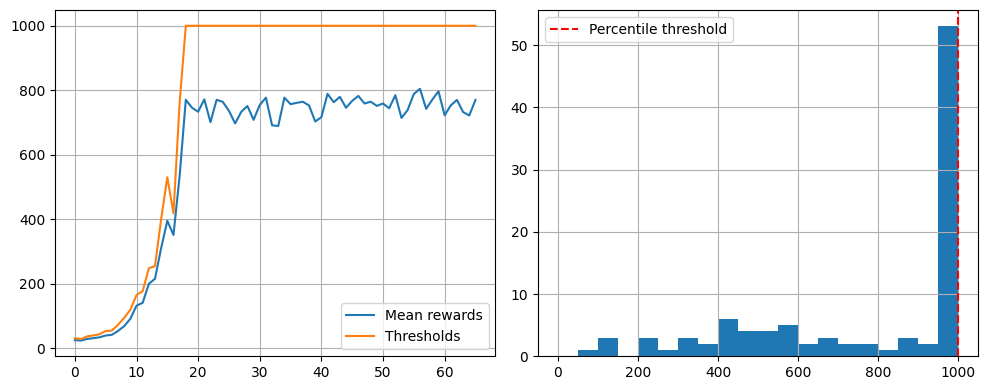

No elite samples this iteration. Skipping training.
[067] mean reward = 791.92, threshold = 1000.00


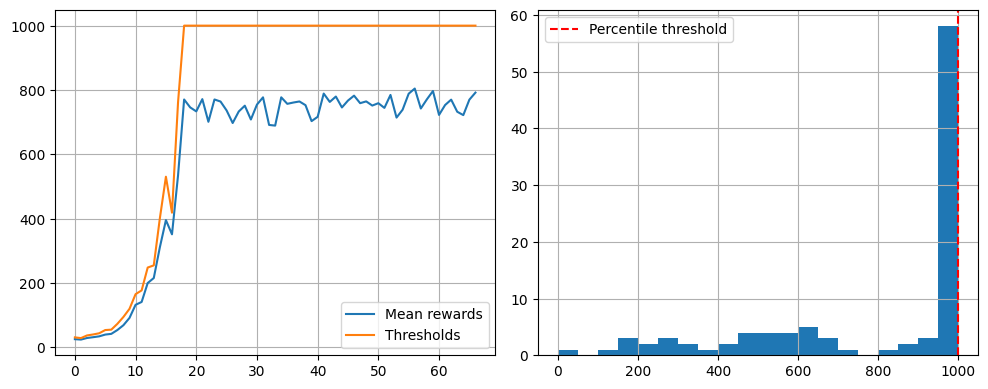

No elite samples this iteration. Skipping training.
[068] mean reward = 763.29, threshold = 1000.00


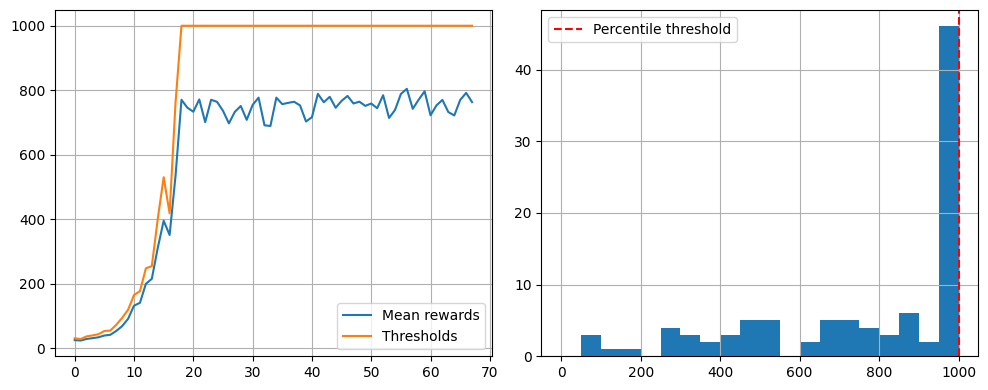

No elite samples this iteration. Skipping training.
[069] mean reward = 788.15, threshold = 1000.00


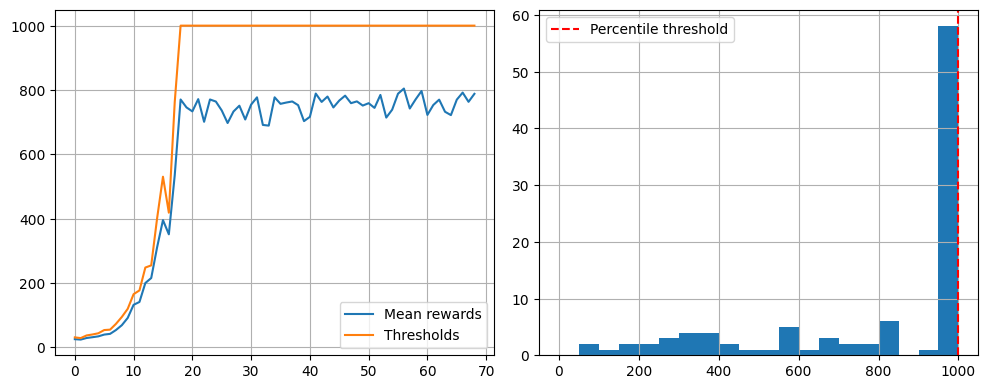

No elite samples this iteration. Skipping training.
[070] mean reward = 711.51, threshold = 1000.00


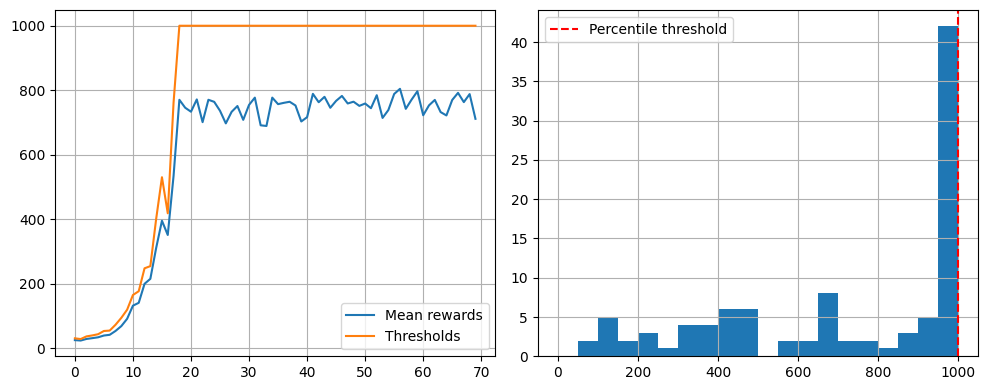

No elite samples this iteration. Skipping training.
[071] mean reward = 768.98, threshold = 1000.00


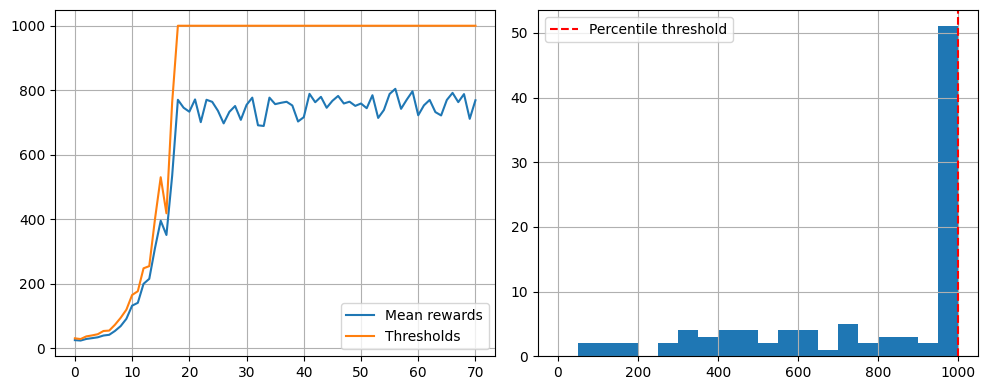

No elite samples this iteration. Skipping training.
[072] mean reward = 759.61, threshold = 1000.00


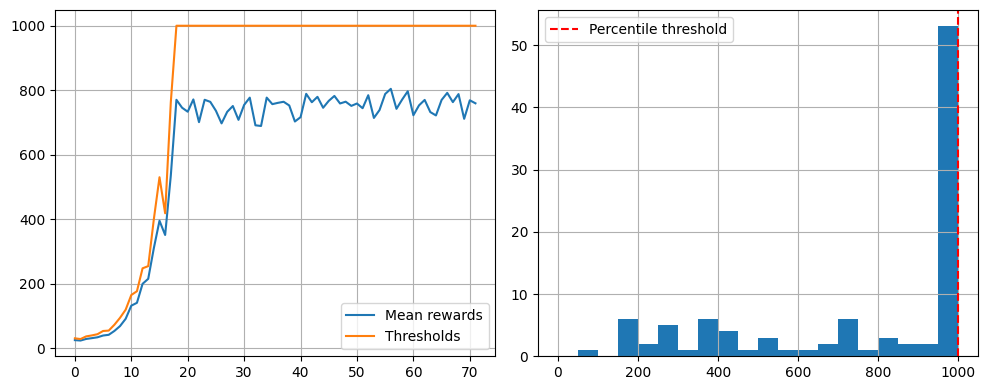

No elite samples this iteration. Skipping training.
[073] mean reward = 760.11, threshold = 1000.00


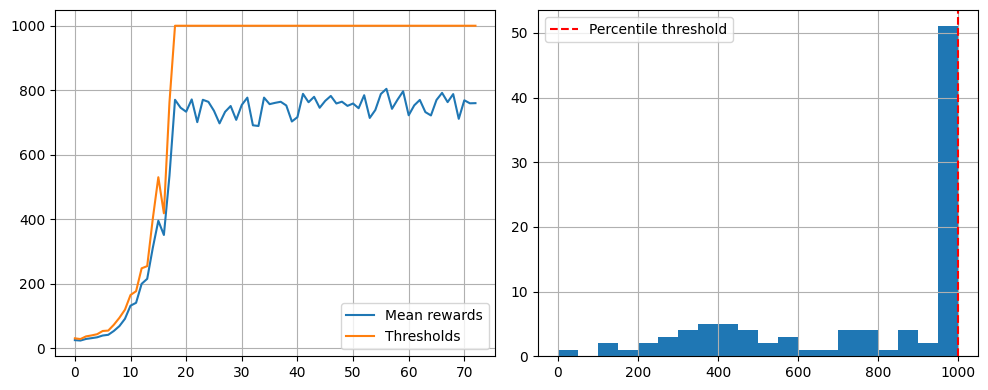

No elite samples this iteration. Skipping training.
[074] mean reward = 753.20, threshold = 1000.00


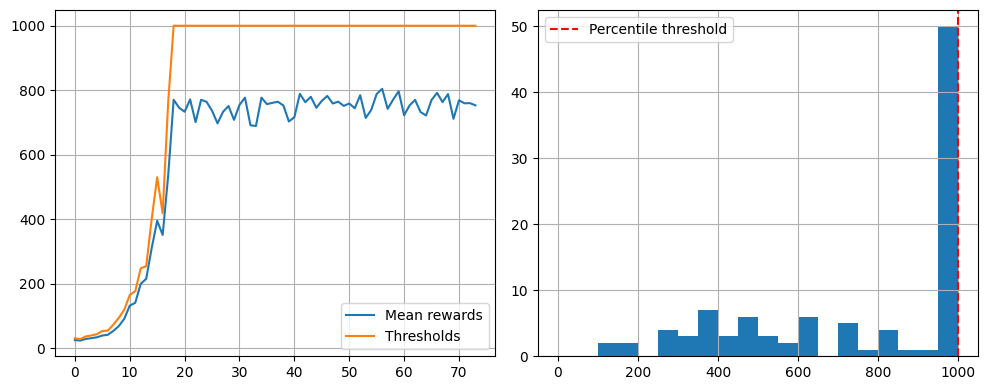

No elite samples this iteration. Skipping training.
[075] mean reward = 765.35, threshold = 1000.00


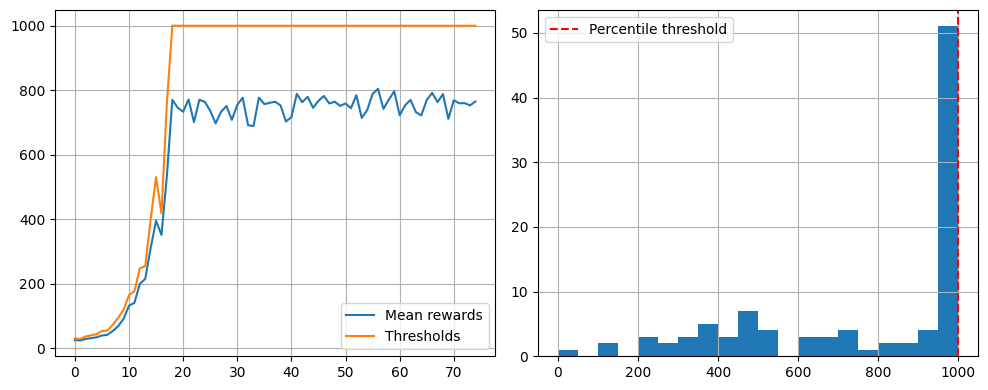

No elite samples this iteration. Skipping training.
[076] mean reward = 760.87, threshold = 1000.00


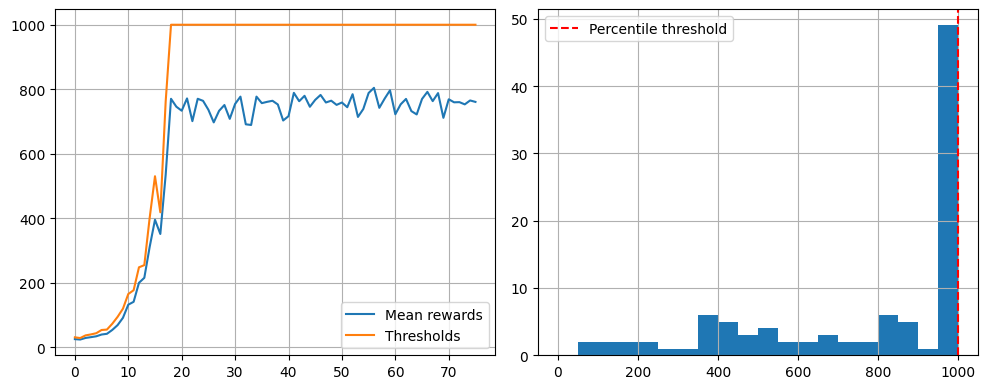

No elite samples this iteration. Skipping training.
[077] mean reward = 747.81, threshold = 1000.00


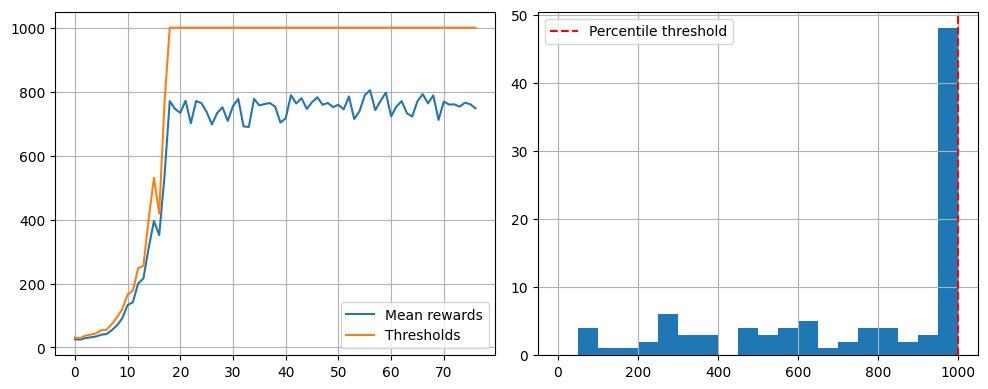

No elite samples this iteration. Skipping training.
[078] mean reward = 757.82, threshold = 1000.00


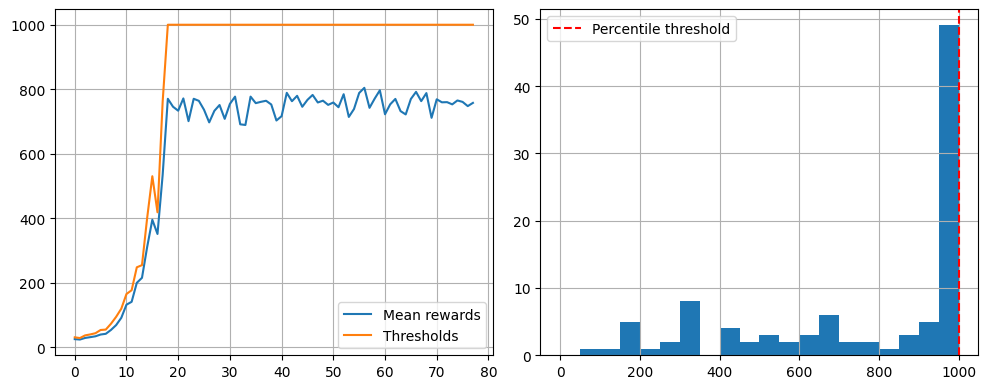

No elite samples this iteration. Skipping training.
[079] mean reward = 690.46, threshold = 1000.00


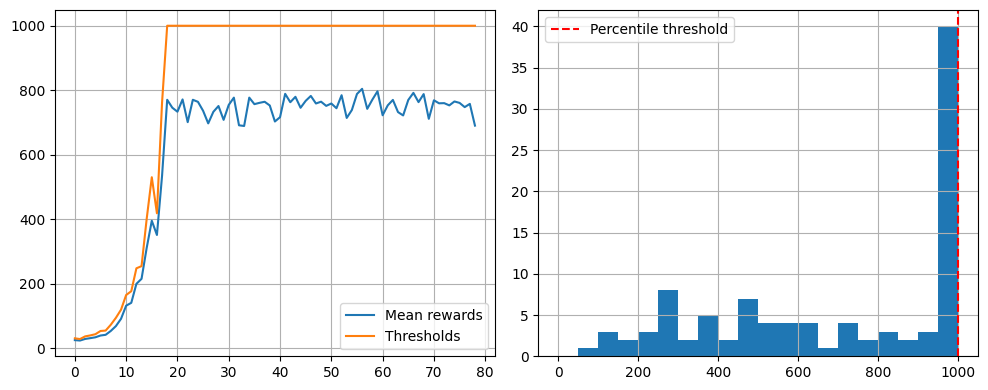

No elite samples this iteration. Skipping training.
[080] mean reward = 767.79, threshold = 1000.00


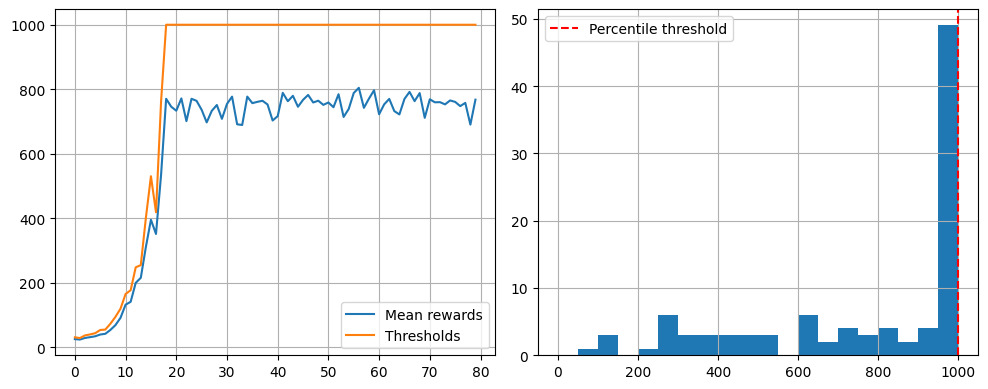

No elite samples this iteration. Skipping training.
[081] mean reward = 835.26, threshold = 1000.00


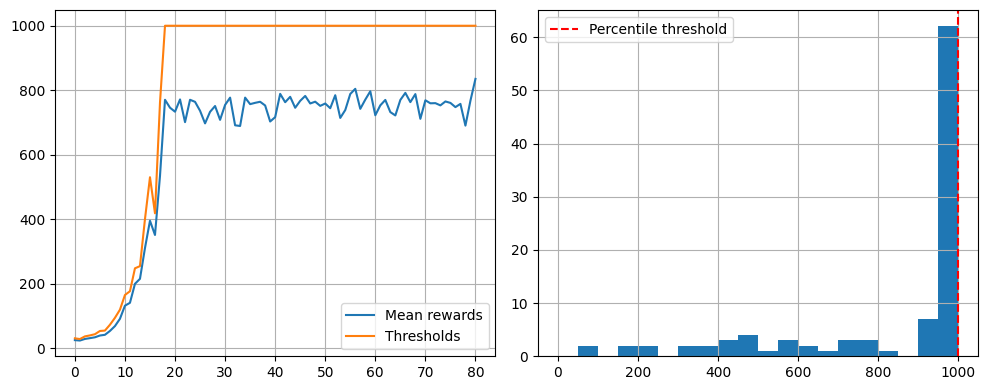

No elite samples this iteration. Skipping training.
[082] mean reward = 729.30, threshold = 1000.00


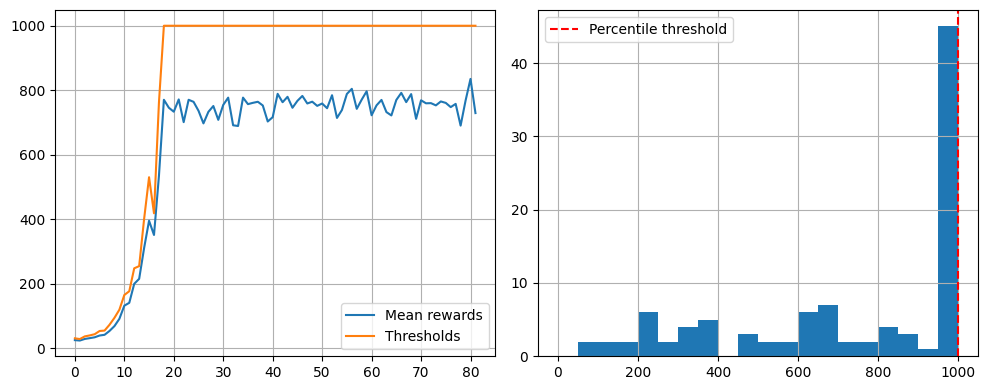

No elite samples this iteration. Skipping training.
[083] mean reward = 719.92, threshold = 1000.00


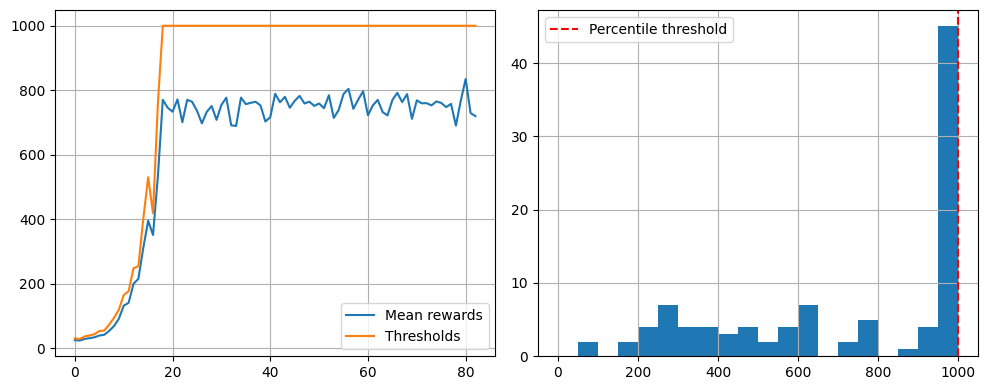

KeyboardInterrupt: 

In [107]:
n_sessions = 100
percentile = 75
log = []

for i in range(100):
    sessions = [generate_session(env, agent) for _ in range(n_sessions)]
    states_batch, actions_batch, rewards_batch = zip(*sessions)
    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile)

    if len(elite_states) == 0 or len(elite_actions) == 0:
        print("No elite samples this iteration. Skipping training.")
        show_progress(rewards_batch, log, percentile, reward_range=[0, np.max(rewards_batch)])
        continue

    X = np.array(elite_states)
    y = np.array(elite_actions)

    assert len(X.shape) == 2, f"X must be 2D array, got shape {X.shape}"

    agent.partial_fit(X, y)
    
    show_progress(rewards_batch, log, percentile, reward_range=[0, np.max(rewards_batch)])

    if np.mean(rewards_batch) > 190:
        print("You Win! You may stop training now via KeyboardInterrupt.")

In [114]:
from gymnasium.wrappers import RecordVideo

with RecordVideo(
    env=gym.make("CartPole-v1", render_mode="rgb_array"),
    video_folder="./videos",
    episode_trigger=lambda episode_number: True,
) as env_monitor:
    sessions = [generate_session(env_monitor, agent) for _ in range(100)]

C:\Users\Danil\AppData\Local\Programs\Python\Python310\lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at D:\Projects\PyCharm\6semestr\Neiron\laba8\videoss folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [121]:
from pathlib import Path
from base64 import b64encode
from IPython.display import HTML

video_paths = sorted([p for p in Path("./videos").rglob("*.mp4")])
print("Файл видео:", video_paths[-1])
video_path = video_paths[-1] 

if "google.colab" in sys.modules:
    with video_path.open("rb") as fp:
        mp4 = fp.read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
else:
    data_url = str(video_path)

HTML(
    """
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format(
        data_url
    )
)


Файл видео: videos\rl-video-episode-3.mp4
